# Statistics for AI and Data Science: Coursework 3

**Table of Contents**

1. Section 1: Introduction
2. Section 2: Loading and Preparing the Data 
  * Section 2.1: Region and Area Data
  * Section 2.2: Assigning a Region to Each Area
  * Section 2.3: Missing Values
3. Section 3: Trends
  * Section 3.1: Trends Over All 36 Months
  * Section 3.2: Trends by Area Charts
  * Section 3.3: Trends Between Given Time Periods
  * Section 3.4: Comments and Comparisons
4. Section 4: Price Changes
  * Section 4.1: Calculating Price Changes
  * Section 4.2: Visualising Price Changes
  * Section 4.3: Comments
5. Section 5: Statistical Analysis
  * Section 5.1: Cross-Tabulation
  * Section 5.2: Chi-Square Test

## Section 1: Introduction
This notebook presents an analysis of UK property prices over a 36 month period between 1st September 2016 and 1st August 2019. The aim of the analysis is to compare price trends and changes between various regions and property types.

## Section 2: Loading and Preparing the Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats

In [2]:
price = pd.read_csv('average-property-price.csv')

In [3]:
price = price.assign(Month = pd.to_datetime(price['Date'], dayfirst=True)).drop(labels='Date', axis=1)

In [4]:
location = pd.read_csv('location-codes.csv')

### Section 2.1: Region and Area Data

In [5]:
region = price[price['Code'].str.contains('E12')]

In [6]:
area = price[~price['Code'].str.contains('E12')]

### Section 2.2: Assigning a Region to Each Area

In [7]:
authority_region = pd.Series(location.RegionName.values,index=location.AuthorityCode).to_dict()

In [8]:
def whichRegion(row):
    for i in range(len(authority_region)):
        return authority_region[row]

In [9]:
area = area.assign(Region = area.Code.apply(whichRegion))

### Section 2.3: Missing Values

In [10]:
area.isna().sum()

Area         0
Code         0
Detached    36
Semi        36
Terraced    20
Flat         0
Month        0
Region       0
dtype: int64

In [11]:
area = area.dropna()

In [12]:
region.isna().sum()

Area        0
Code        0
Detached    0
Semi        0
Terraced    0
Flat        0
Month       0
dtype: int64

36 Detached, 36 Semi-Attached and 20 Terraced properties were found to have missing, or not a number (NaN) values, in the 'area' DataFrame. These were removed for further analysis as they account for a very small proportion of the overall data

## Section 3: Trends

### Section 3.1: Trends Over All 36 Months
Below, the price changes for Detached properties and Flats are compared for the entire 36 month period.

In [13]:
def makeTime(row):
    return pd.Timestamp(row.Month)

region2 = region.assign(DateTime = region.apply(makeTime, axis=1))
region2 = region2.drop(labels=['Month'],axis=1)
region2 = region2.set_index(keys='DateTime')

In [14]:
region.Area.unique()

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands Region', 'East of England',
       'London', 'South East', 'South West'], dtype=object)

In [15]:
NE = region2[(region2.Area == 'North East')]
NW = region2[(region2.Area == 'North West')]
YH = region2[(region2.Area == 'Yorkshire and The Humber')]
EM = region2[(region2.Area == 'East Midlands')]
WM = region2[(region2.Area == 'West Midlands Region')]
EE = region2[(region2.Area == 'East of England')]
LDN = region2[(region2.Area == 'London')]
SE = region2[(region2.Area == 'South East')]
SW = region2[(region2.Area == 'South West')]

* *if you have time, write a function so that the cells below are not so lengthy and repetitive*
* *group the above DFs into a list, then set the function to iterate through the list*

Text(0.5, 1.0, 'South West Price Trends')

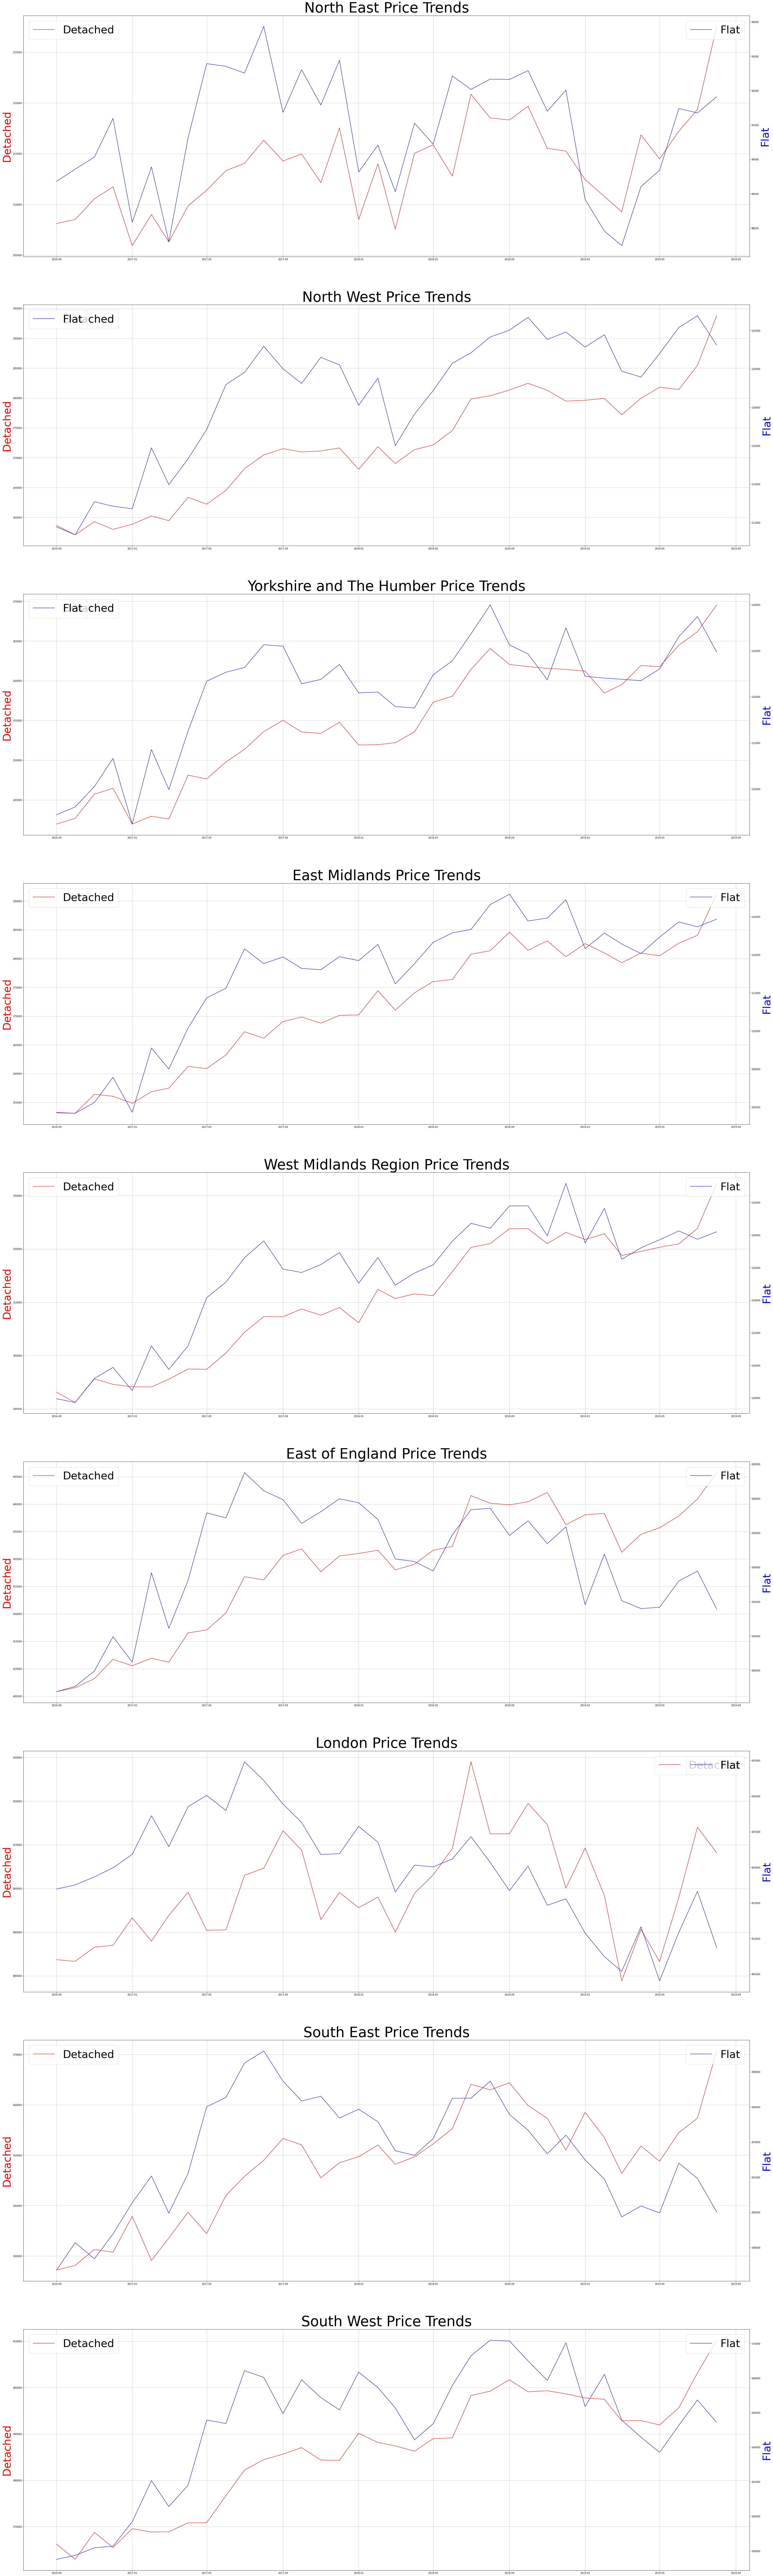

In [16]:
# change so that legends are not overlapping
# change axis tick size
fig, (a1, b1, c1, d1, e1, f1, g1, h1, i1) = plt.subplots(9, 1, figsize=(55, 30))
plt.subplots_adjust(left=None, right=None, bottom=5, top=10, wspace=None, hspace=None)

a1.plot(NE.loc[:, 'Detached'], color='r', label='Detached')
a2 = a1.twinx()
a2.plot(NE.loc[:, 'Flat'], color='b', label='Flat')
a1.grid()
a1.legend(fontsize=45)
a2.legend(fontsize=45)
a1.set_ylabel('Detached', fontsize=45, color='r')
a2.set_ylabel('Flat', fontsize=45, color='b')
a1.set_title('North East Price Trends', fontsize=60)

b1.plot(NW.loc[:, 'Detached'], color='r', label='Detached')
b2 = b1.twinx()
b2.plot(NW.loc[:, 'Flat'], color='b', label='Flat')
b1.grid()
b1.legend(fontsize=45)
b2.legend(fontsize=45)
b1.set_ylabel('Detached', fontsize=45, color='r')
b2.set_ylabel('Flat', fontsize=45, color='b')
b1.set_title('North West Price Trends', fontsize=60)

c1.plot(YH.loc[:, 'Detached'], color='r', label='Detached')
c2 = c1.twinx()
c2.plot(YH.loc[:, 'Flat'], color='b', label='Flat')
c1.grid()
c1.legend(fontsize=45)
c2.legend(fontsize=45)
c1.set_ylabel('Detached', fontsize=45, color='r')
c2.set_ylabel('Flat', fontsize=45, color='b')
c1.set_title('Yorkshire and The Humber Price Trends', fontsize=60)

d1.plot(EM.loc[:, 'Detached'], color='r', label='Detached')
d2 = d1.twinx()
d2.plot(EM.loc[:, 'Flat'], color='b', label='Flat')
d1.grid()
d1.legend(fontsize=45)
d2.legend(fontsize=45)
d1.set_ylabel('Detached', fontsize=45, color='r')
d2.set_ylabel('Flat', fontsize=45, color='b')
d1.set_title('East Midlands Price Trends', fontsize=60)

e1.plot(WM.loc[:, 'Detached'], color='r', label='Detached')
e2 = e1.twinx()
e2.plot(WM.loc[:, 'Flat'], color='b', label='Flat')
e1.grid()
e1.legend(fontsize=45)
e2.legend(fontsize=45)
e1.set_ylabel('Detached', fontsize=45, color='r')
e2.set_ylabel('Flat', fontsize=45, color='b')
e1.set_title('West Midlands Region Price Trends', fontsize=60)

f1.plot(EE.loc[:, 'Detached'], color='r', label='Detached')
f2 = f1.twinx()
f2.plot(EE.loc[:, 'Flat'], color='b', label='Flat')
f1.grid()
f1.legend(fontsize=45)
f2.legend(fontsize=45)
f1.set_ylabel('Detached', fontsize=45, color='r')
f2.set_ylabel('Flat', fontsize=45, color='b')
f1.set_title('East of England Price Trends', fontsize=60)

g1.plot(LDN.loc[:, 'Detached'], color='r', label='Detached')
g2 = g1.twinx()
g2.plot(LDN.loc[:, 'Flat'], color='b', label='Flat')
g1.grid()
g1.legend(fontsize=45)
g2.legend(fontsize=45)
g1.set_ylabel('Detached', fontsize=45, color='r')
g2.set_ylabel('Flat', fontsize=45, color='b')
g1.set_title('London Price Trends', fontsize=60)

h1.plot(SE.loc[:, 'Detached'], color='r', label='Detached')
h2 = h1.twinx()
h2.plot(SE.loc[:, 'Flat'], color='b', label='Flat')
h1.grid()
h1.legend(fontsize=45)
h2.legend(fontsize=45)
h1.set_ylabel('Detached', fontsize=45, color='r')
h2.set_ylabel('Flat', fontsize=45, color='b')
h1.set_title('South East Price Trends', fontsize=60)

i1.plot(SW.loc[:, 'Detached'], color='r', label='Detached')
i2 = i1.twinx()
i2.plot(SW.loc[:, 'Flat'], color='b', label='Flat')
i1.grid()
i1.legend(fontsize=45)
i2.legend(fontsize=45)
i1.set_ylabel('Detached', fontsize=45, color='r')
i2.set_ylabel('Flat', fontsize=45, color='b')
i1.set_title('South West Price Trends', fontsize=60)

### Section 3.2: Trends by Area Charts

Text(0.5, 1.0, 'North East Price Trends')

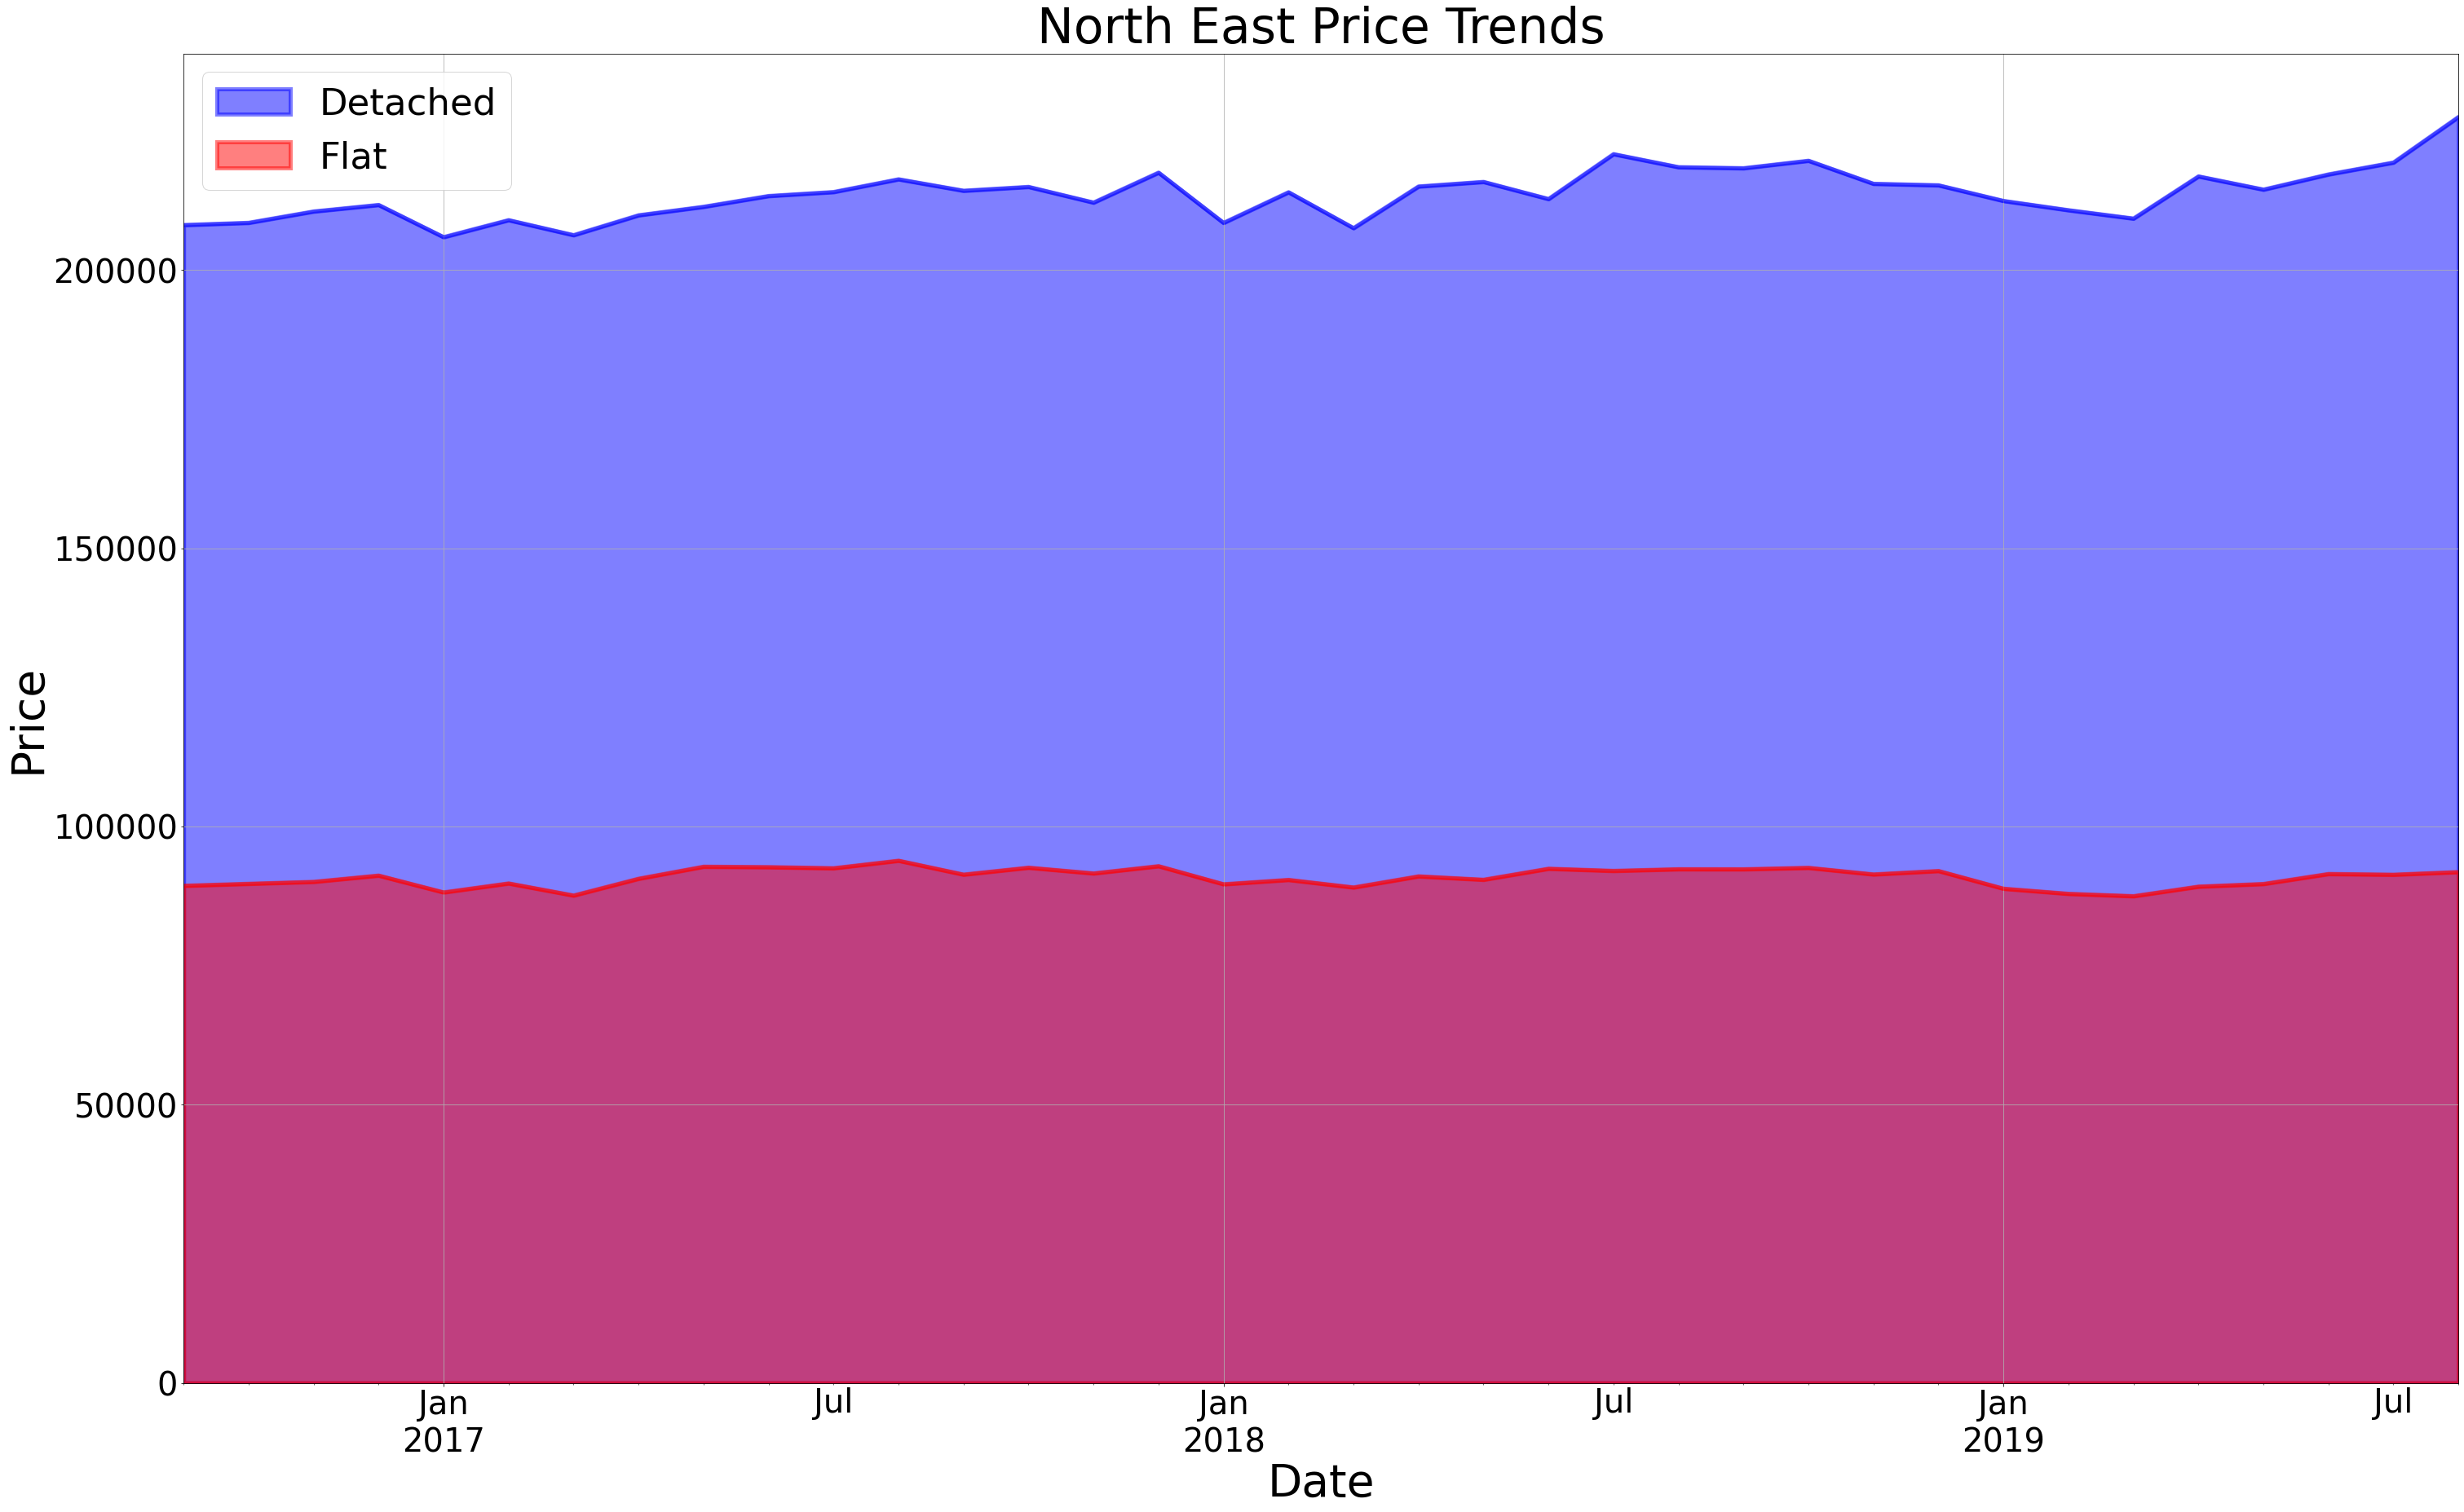

In [17]:
a1 = NE.plot(y=["Detached", 'Flat'], kind="area", stacked=False, color=['b','r'], figsize = (50,30), linewidth=5, fontsize=40)
a1.grid()
a1.legend(fontsize=45)
a1.set_ylabel('Price', fontsize=55)
a1.set_xlabel('Date', fontsize=55)
a1.set_title('North East Price Trends', fontsize=60)

Text(0.5, 1.0, 'North West Price Trends')

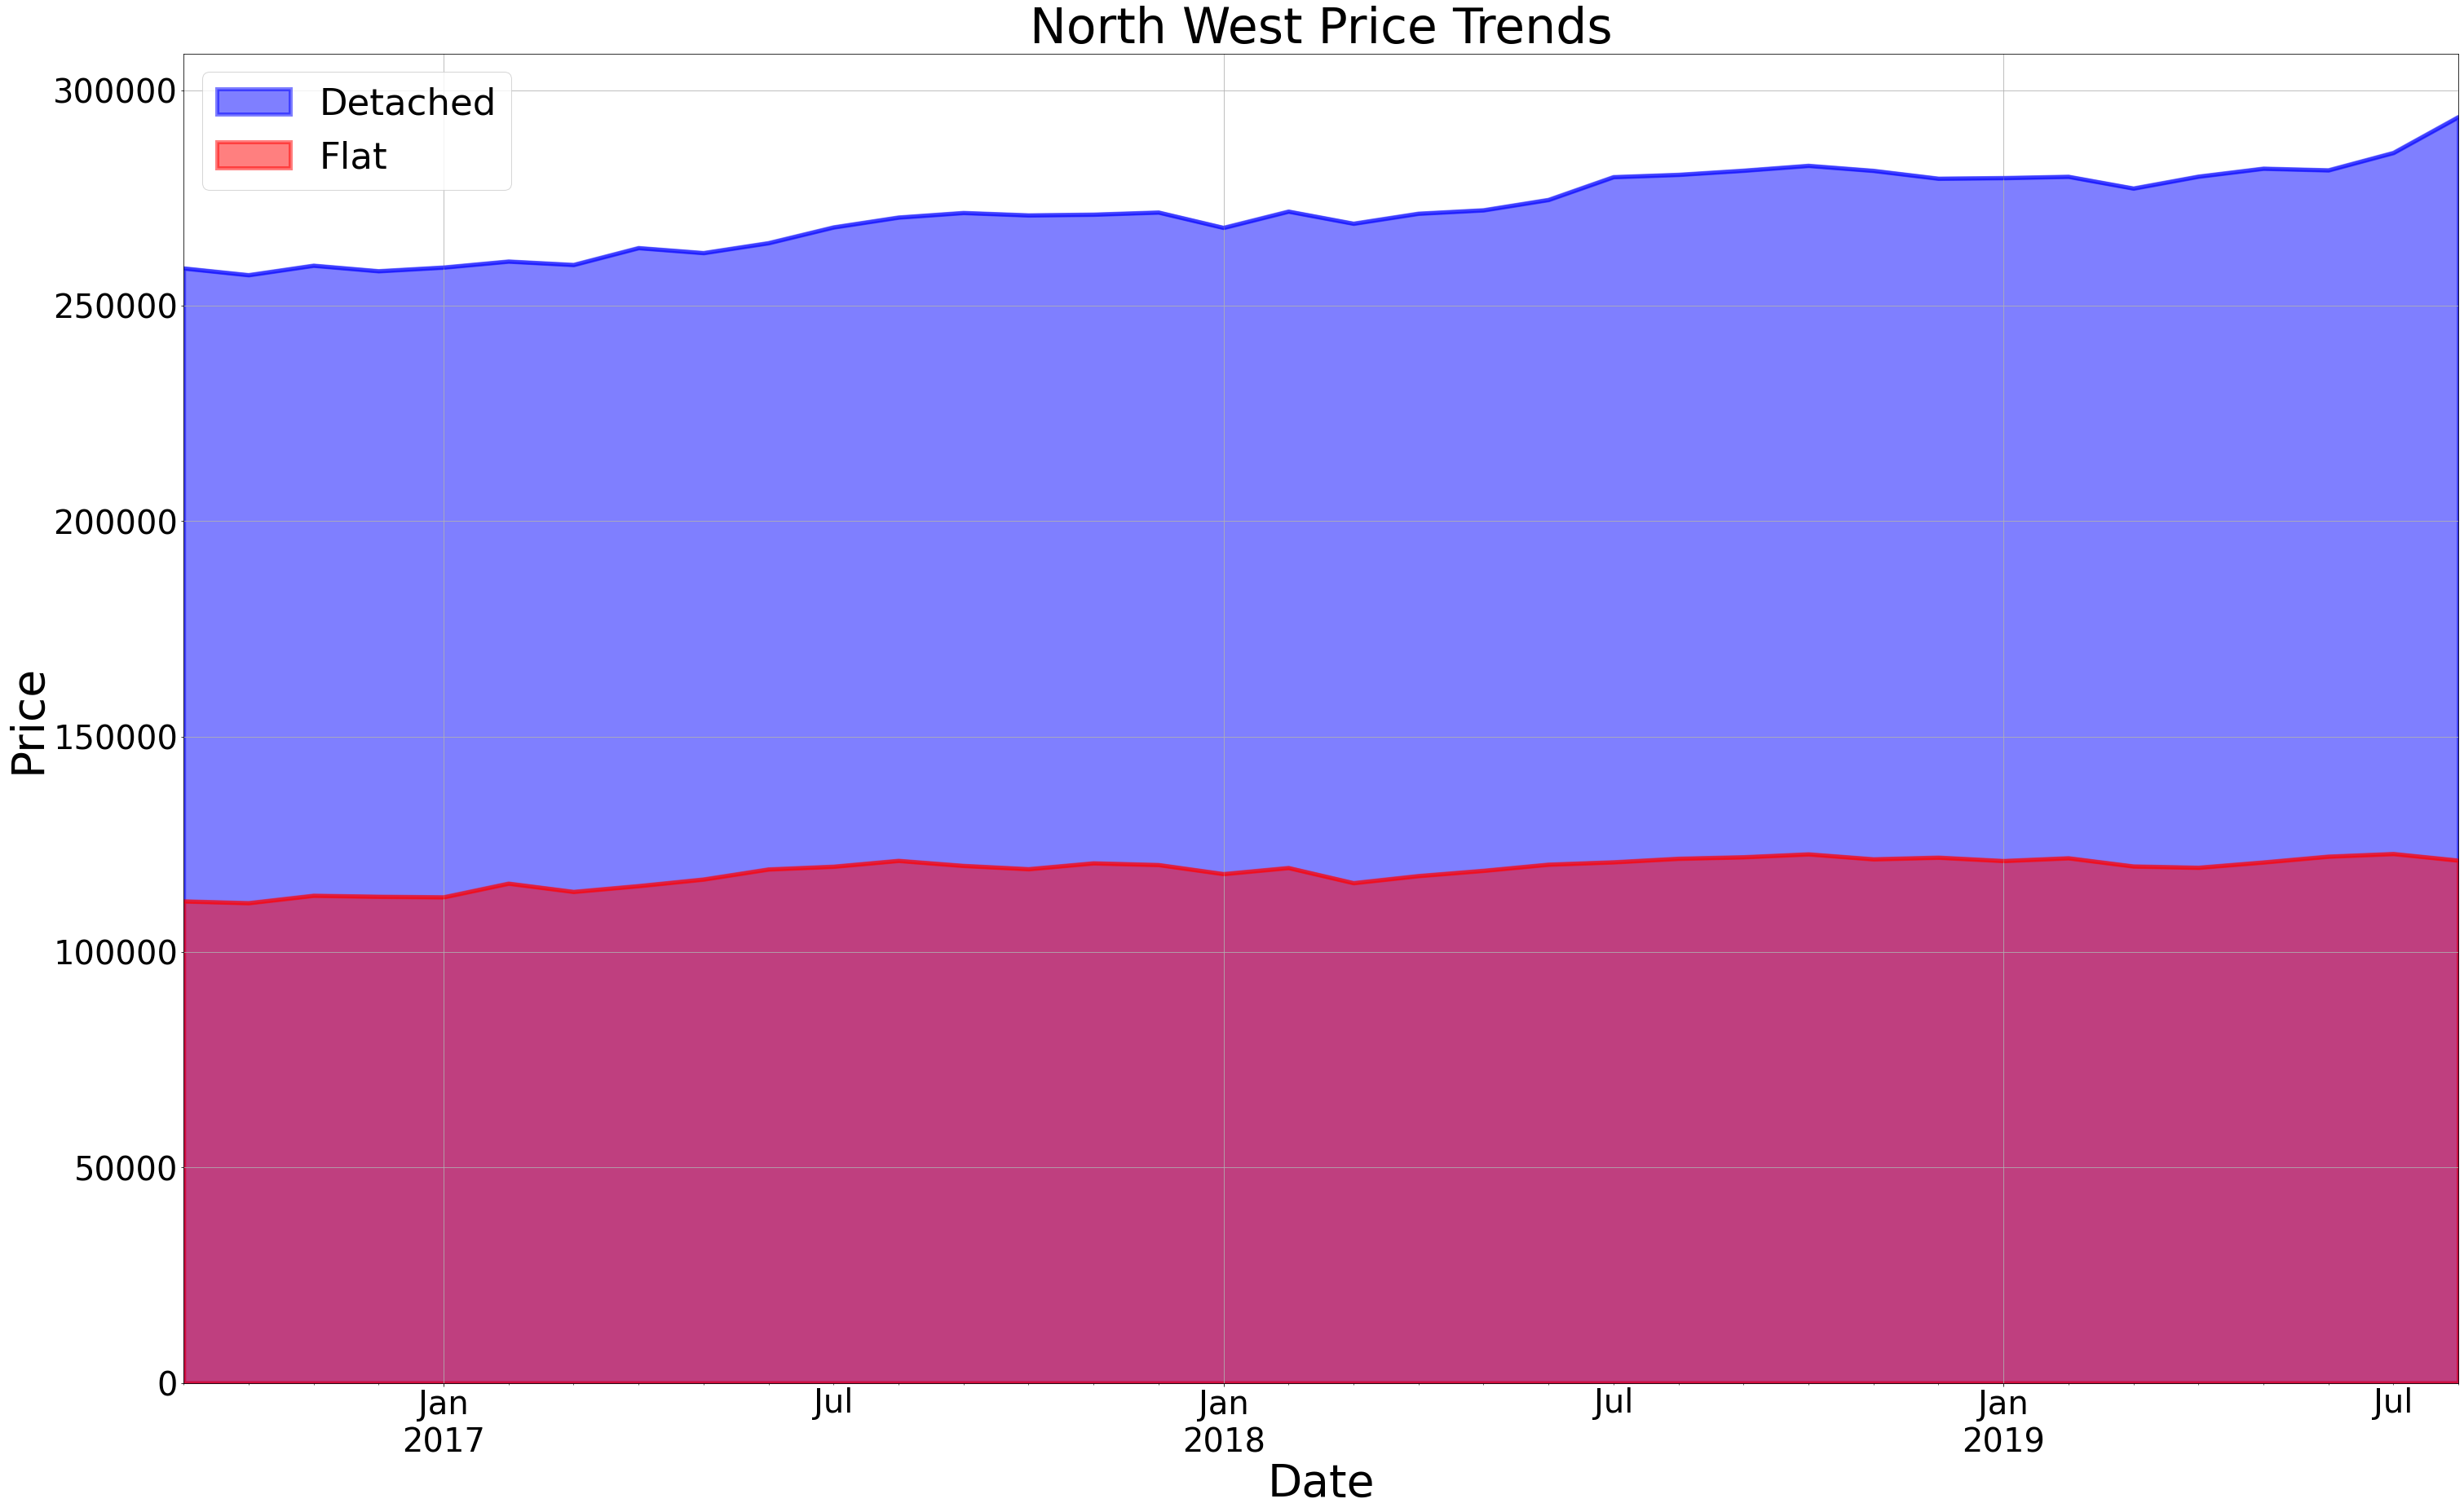

In [18]:
b1 = NW.plot(y=["Detached", 'Flat'], kind="area", stacked=False, color=['b','r'], figsize = (50,30), linewidth=5, fontsize=40)
b1.grid()
b1.legend(fontsize=45)
b1.set_ylabel('Price', fontsize=55)
b1.set_xlabel('Date', fontsize=55)
b1.set_title('North West Price Trends', fontsize=60)

Text(0.5, 1.0, 'Yorkshire and The Humber Price Trends')

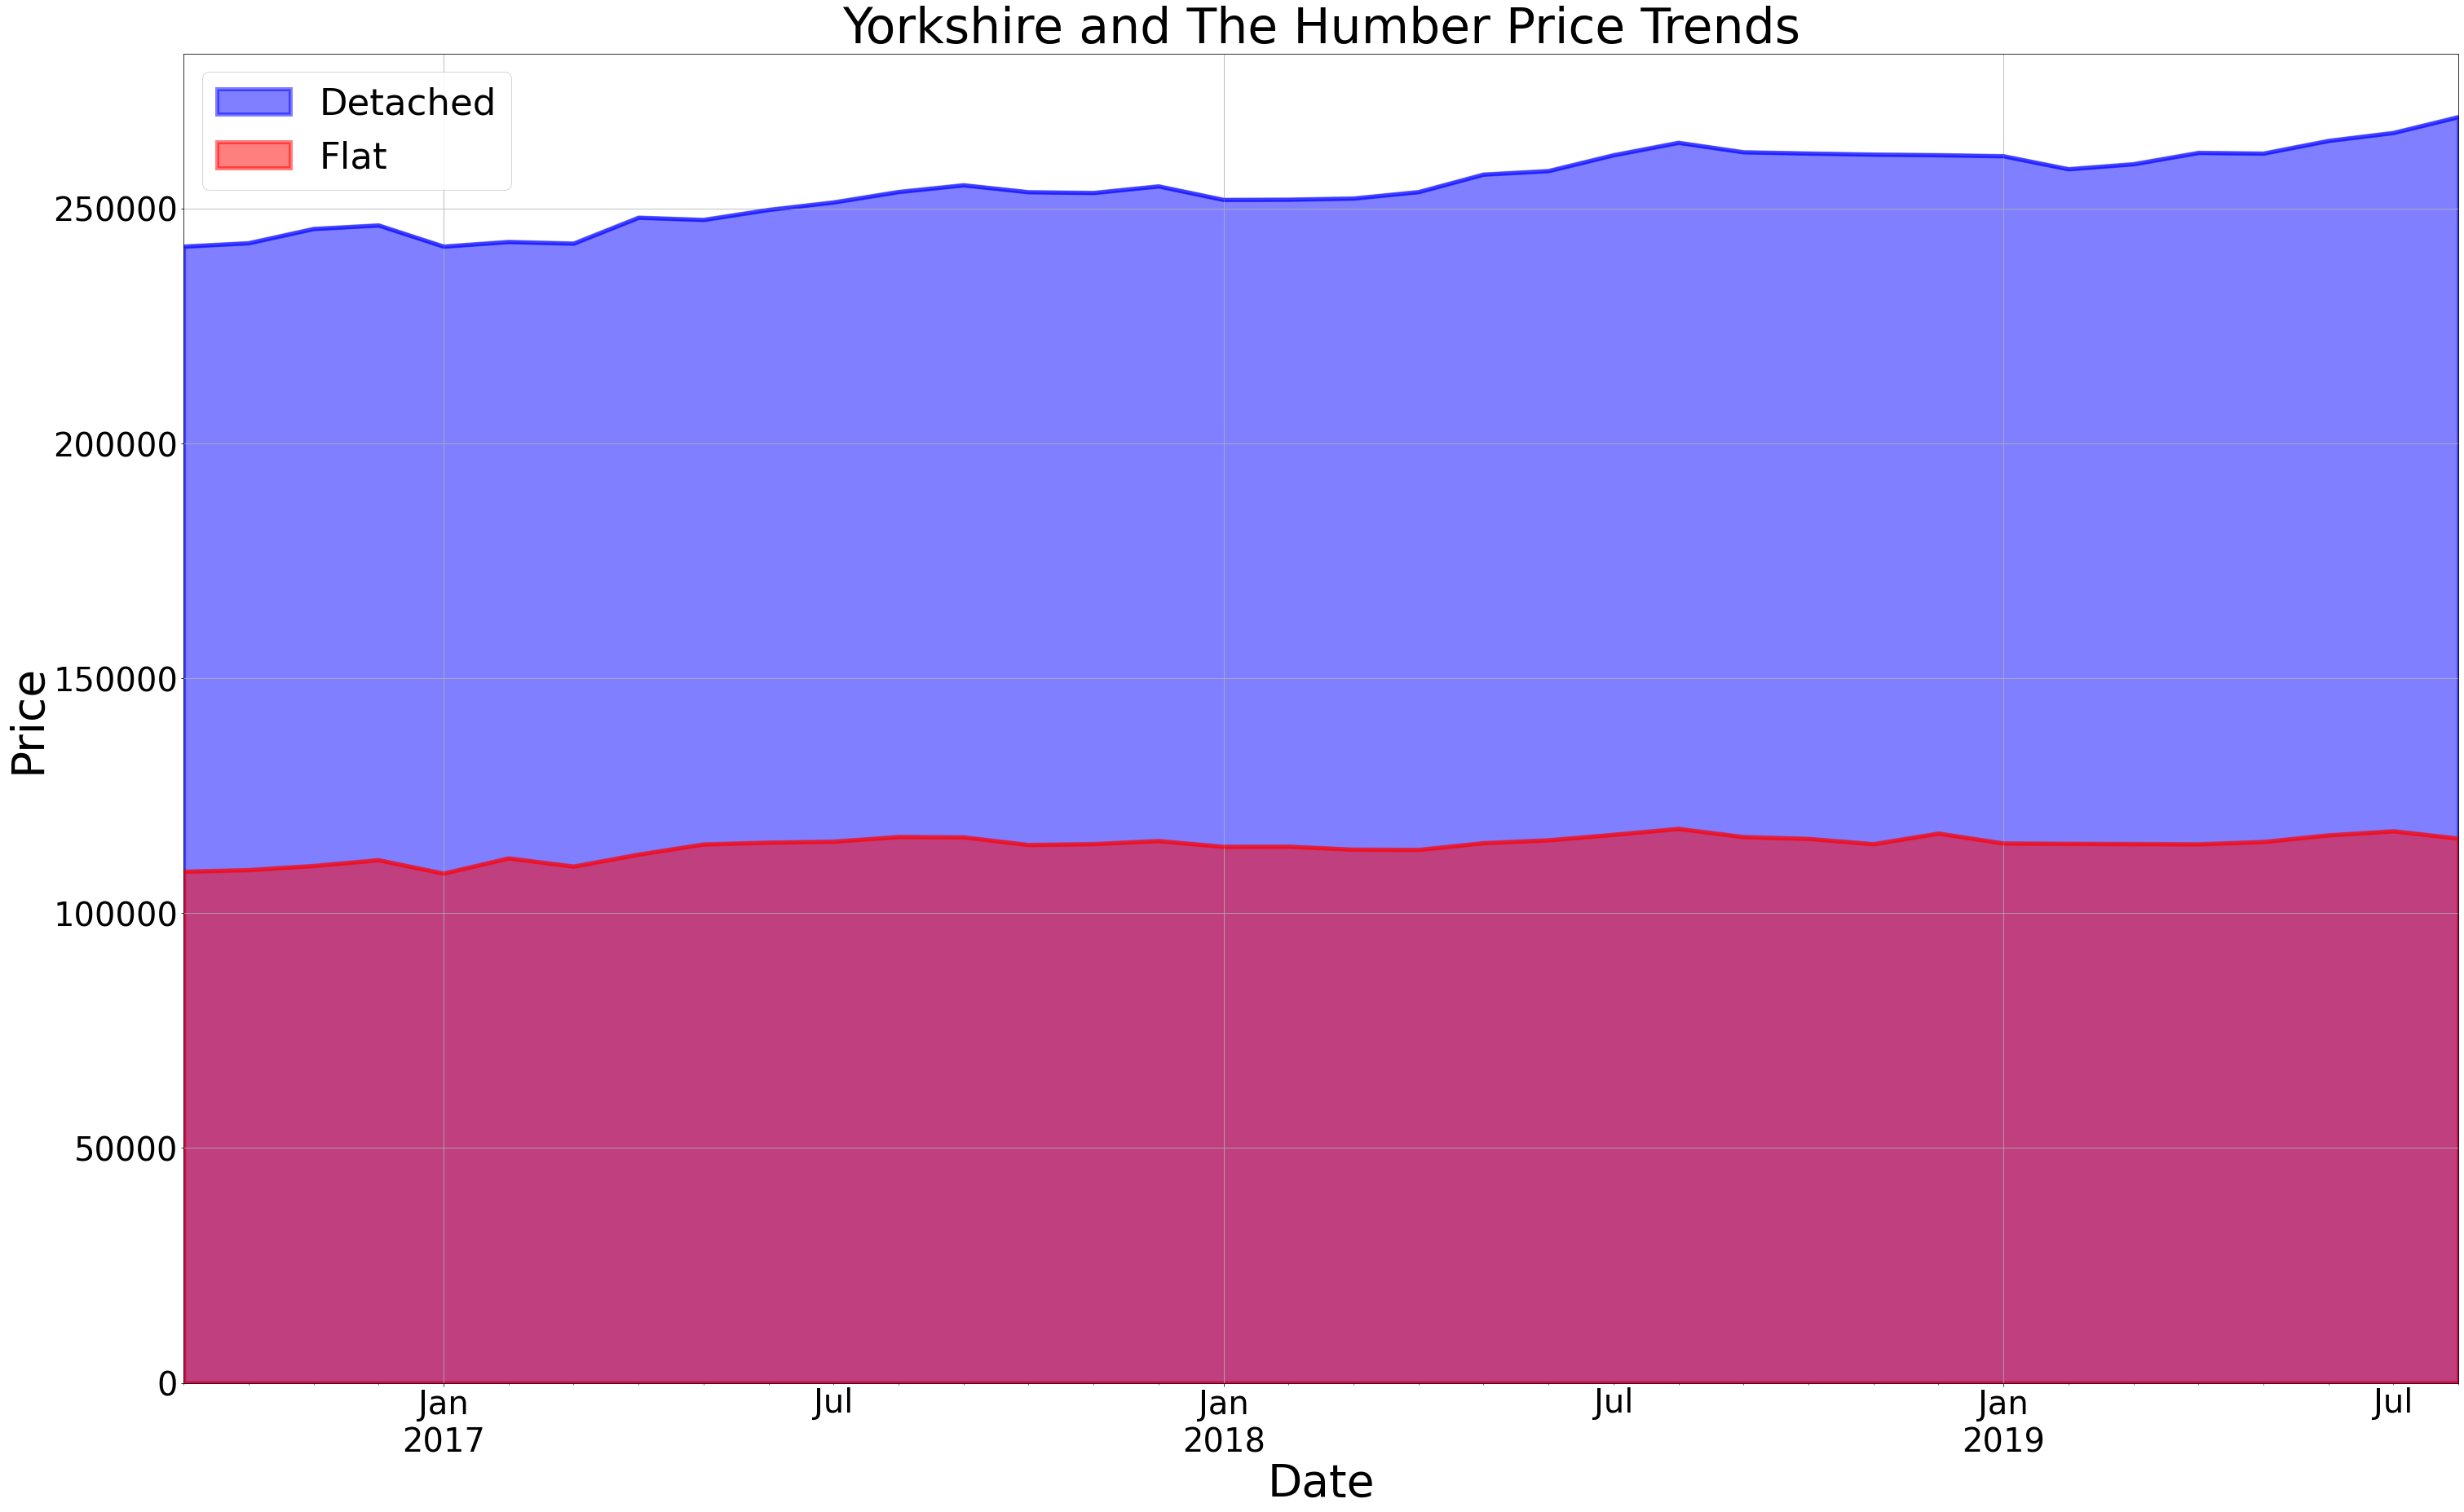

In [19]:
c1 = YH.plot(y=["Detached", 'Flat'], kind="area", stacked=False, color=['b','r'], figsize = (50,30), linewidth=5, fontsize=40)
c1.grid()
c1.legend(fontsize=45)
c1.set_ylabel('Price', fontsize=55)
c1.set_xlabel('Date', fontsize=55)
c1.set_title('Yorkshire and The Humber Price Trends', fontsize=60)

Text(0.5, 1.0, 'East Midlands Price Trends')

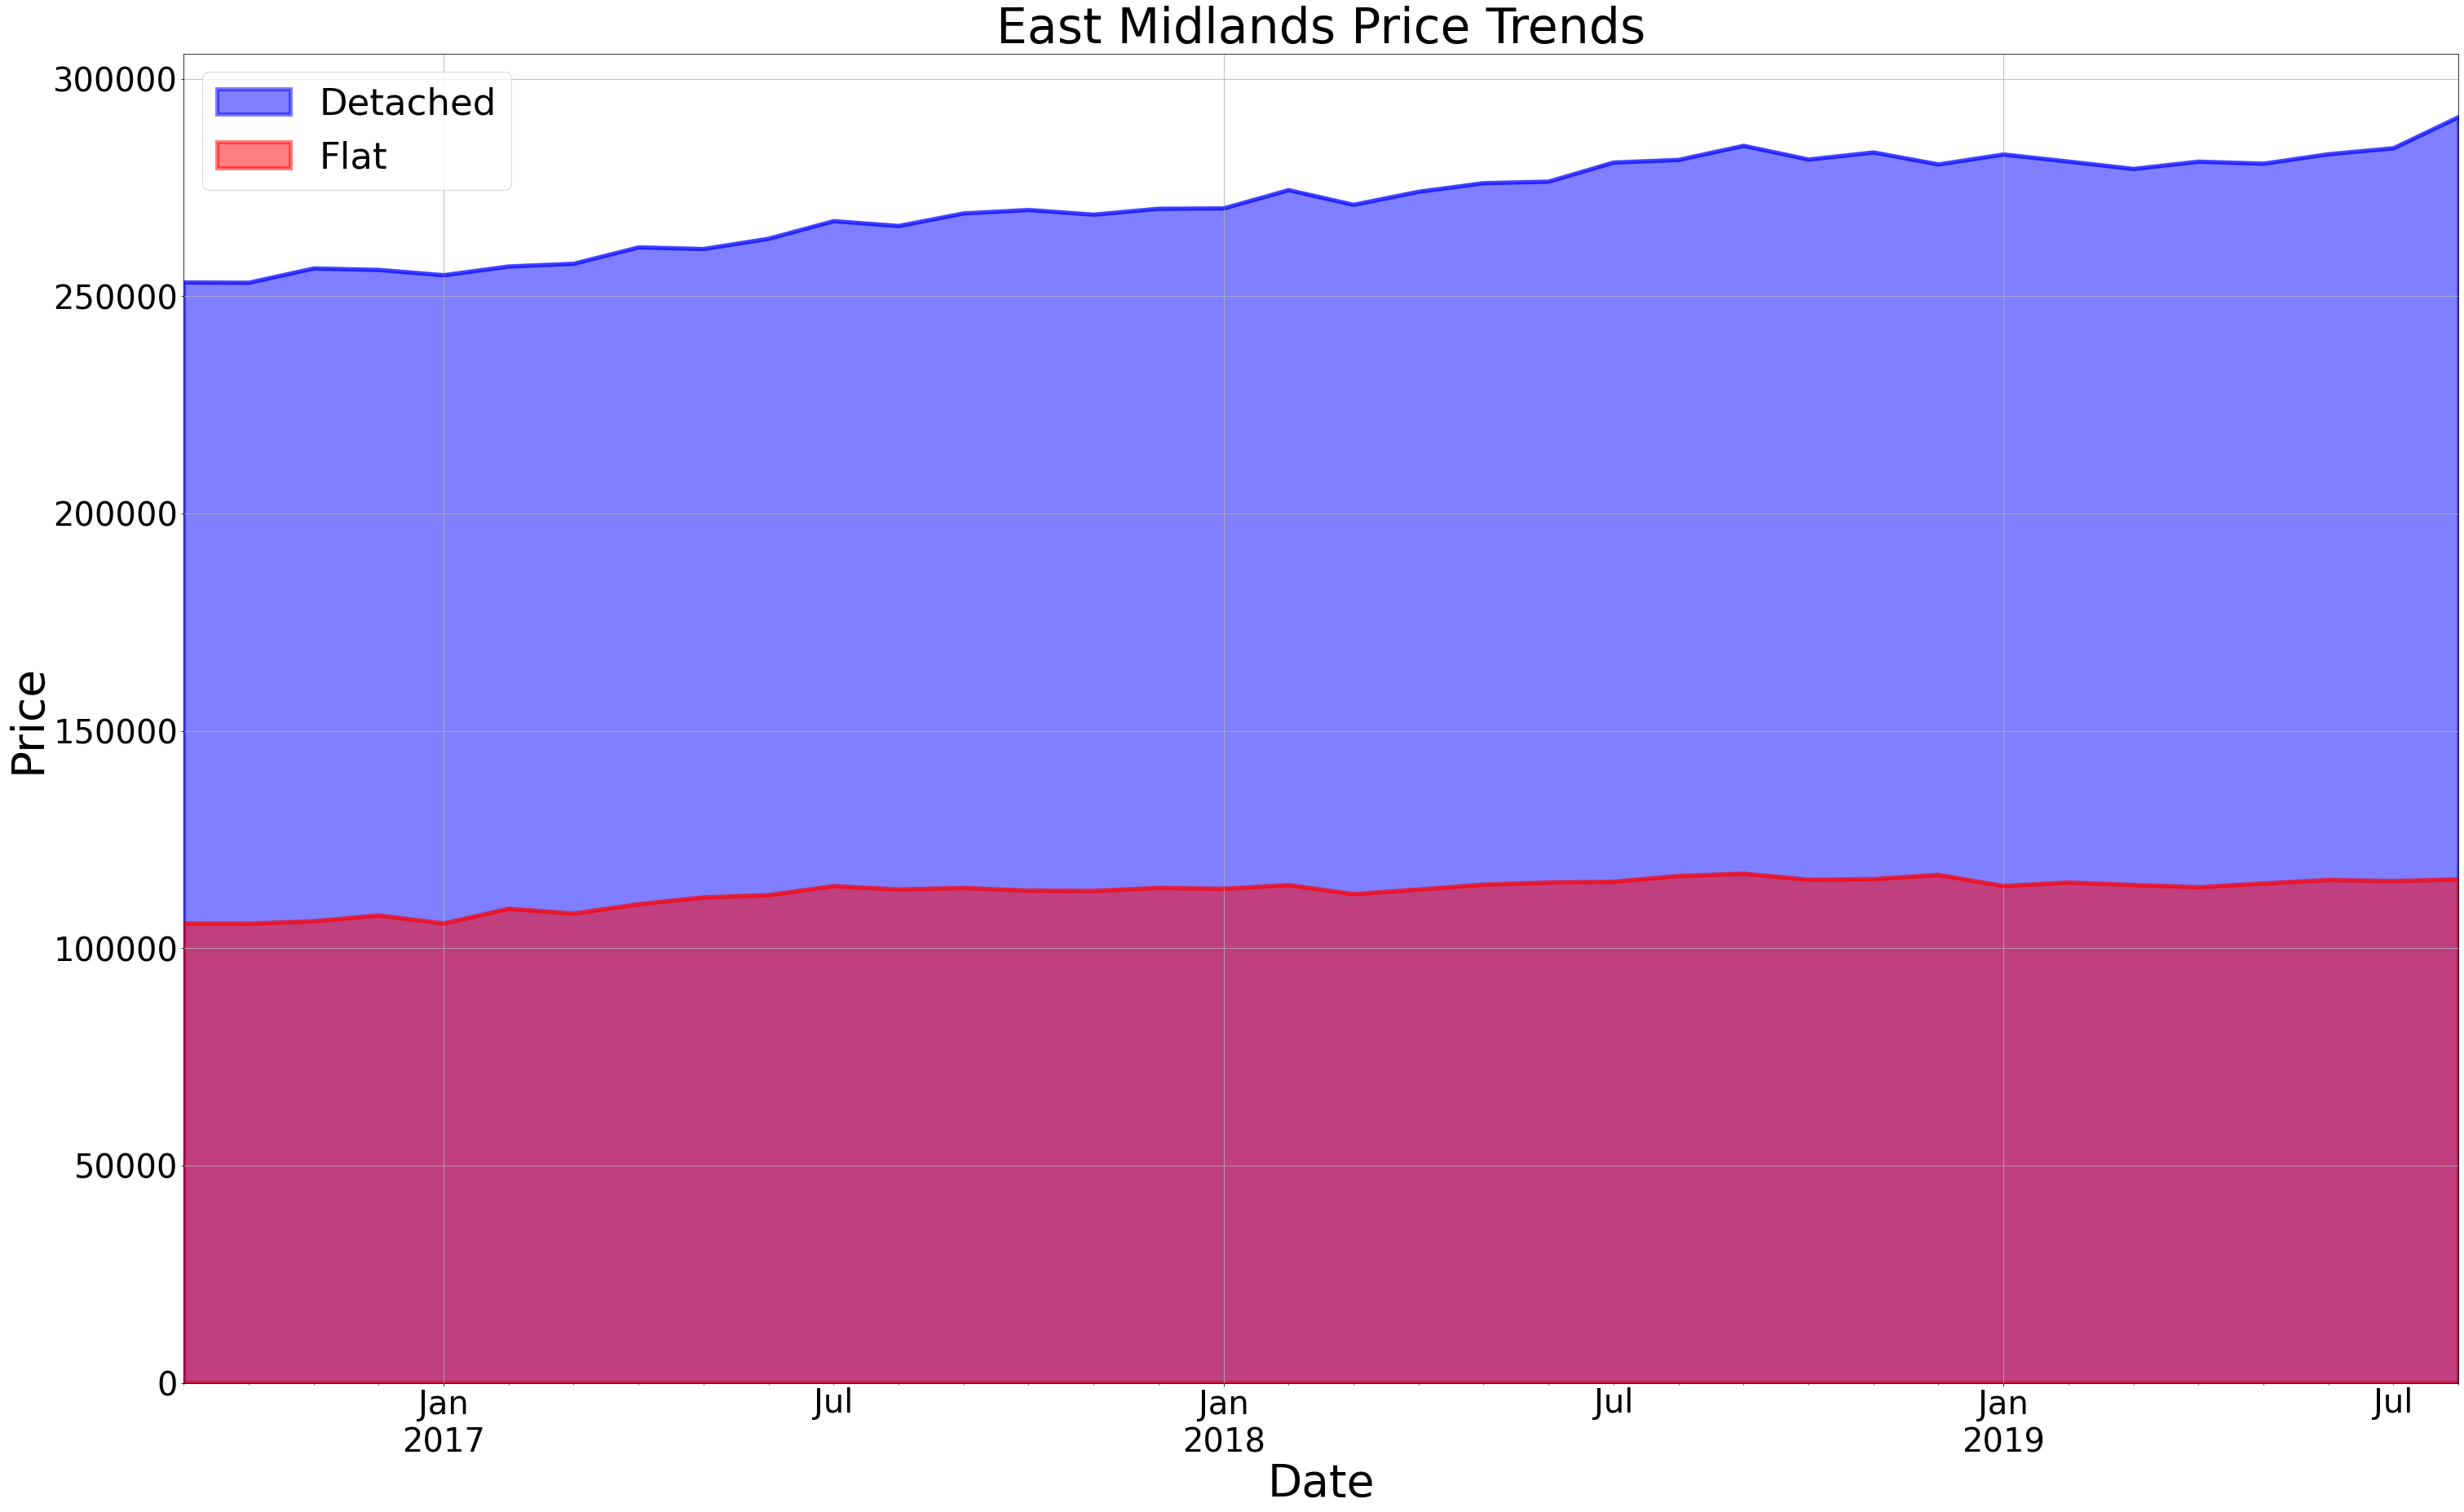

In [20]:
d1 = EM.plot(y=["Detached", 'Flat'], kind="area", stacked=False, color=['b','r'], figsize = (50,30), linewidth=5, fontsize=40)
d1.grid()
d1.legend(fontsize=45)
d1.set_ylabel('Price', fontsize=55)
d1.set_xlabel('Date', fontsize=55)
d1.set_title('East Midlands Price Trends', fontsize=60)

Text(0.5, 1.0, 'West Midlands Price Trends')

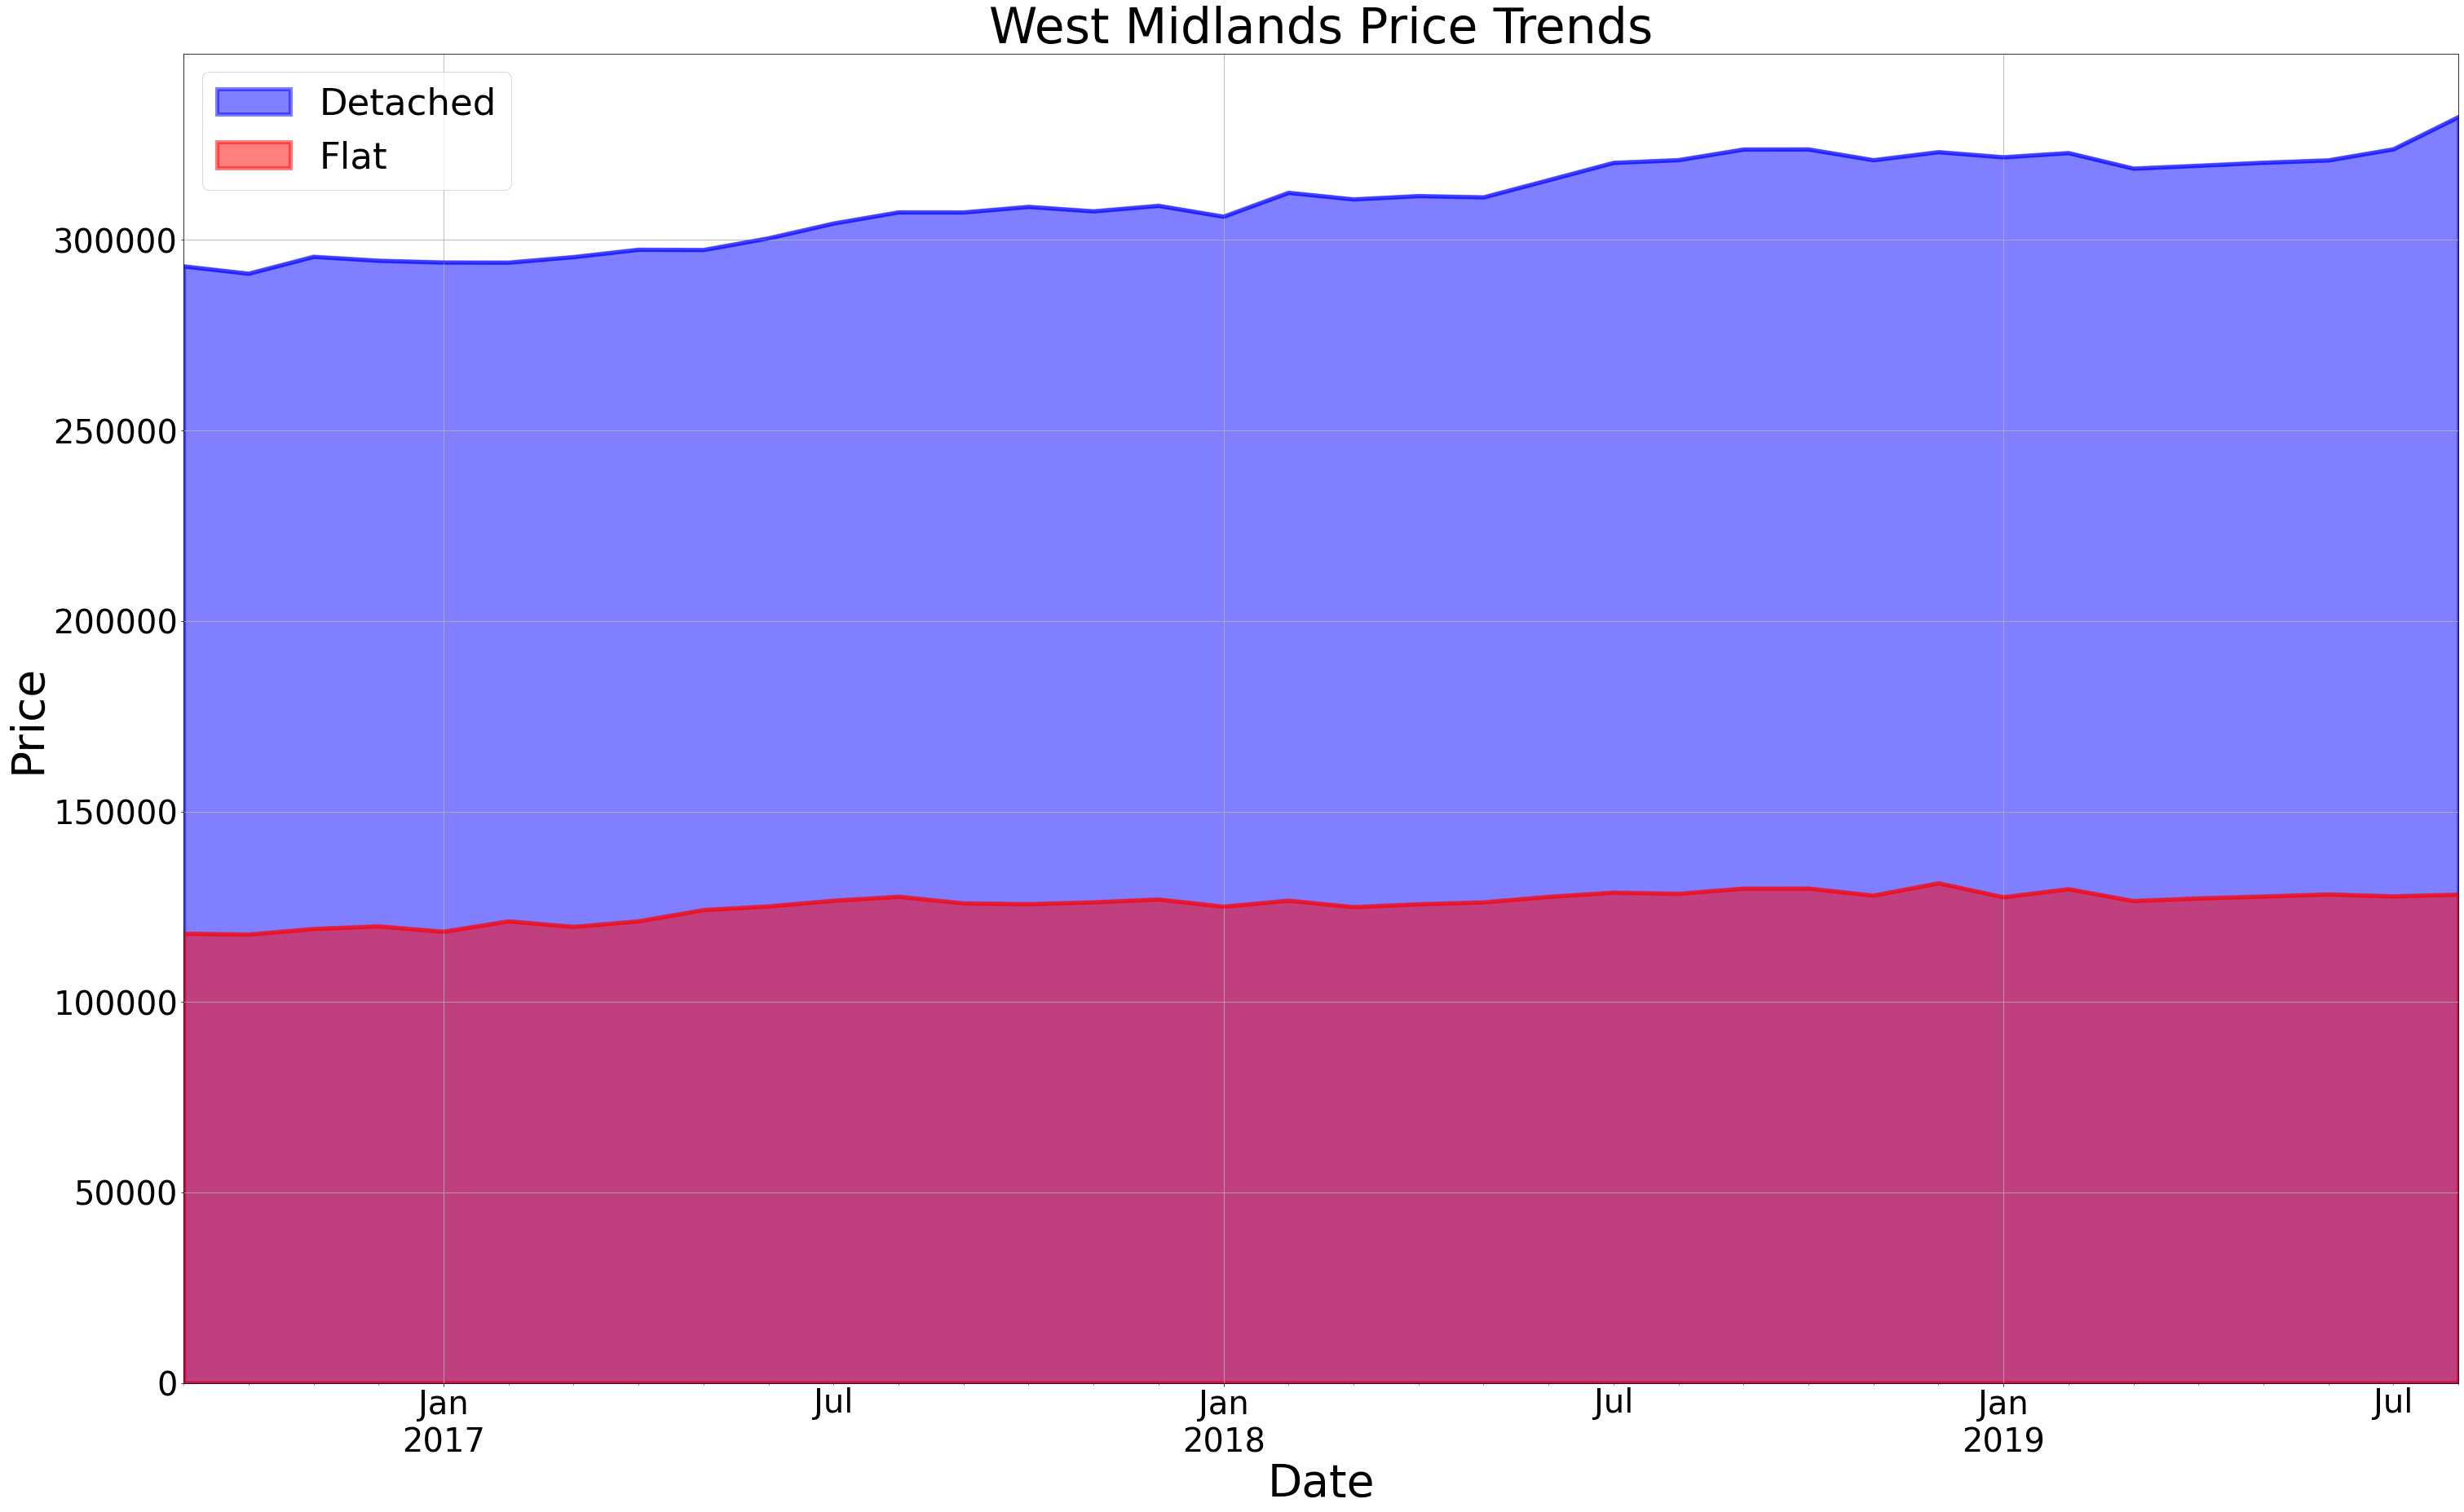

In [21]:
e1 = WM.plot(y=["Detached", 'Flat'], kind="area", stacked=False, color=['b','r'], figsize = (50,30), linewidth=5, fontsize=40)
e1.grid()
e1.legend(fontsize=45)
e1.set_ylabel('Price', fontsize=55)
e1.set_xlabel('Date', fontsize=55)
e1.set_title('West Midlands Price Trends', fontsize=60)

Text(0.5, 1.0, 'East of England Price Trends')

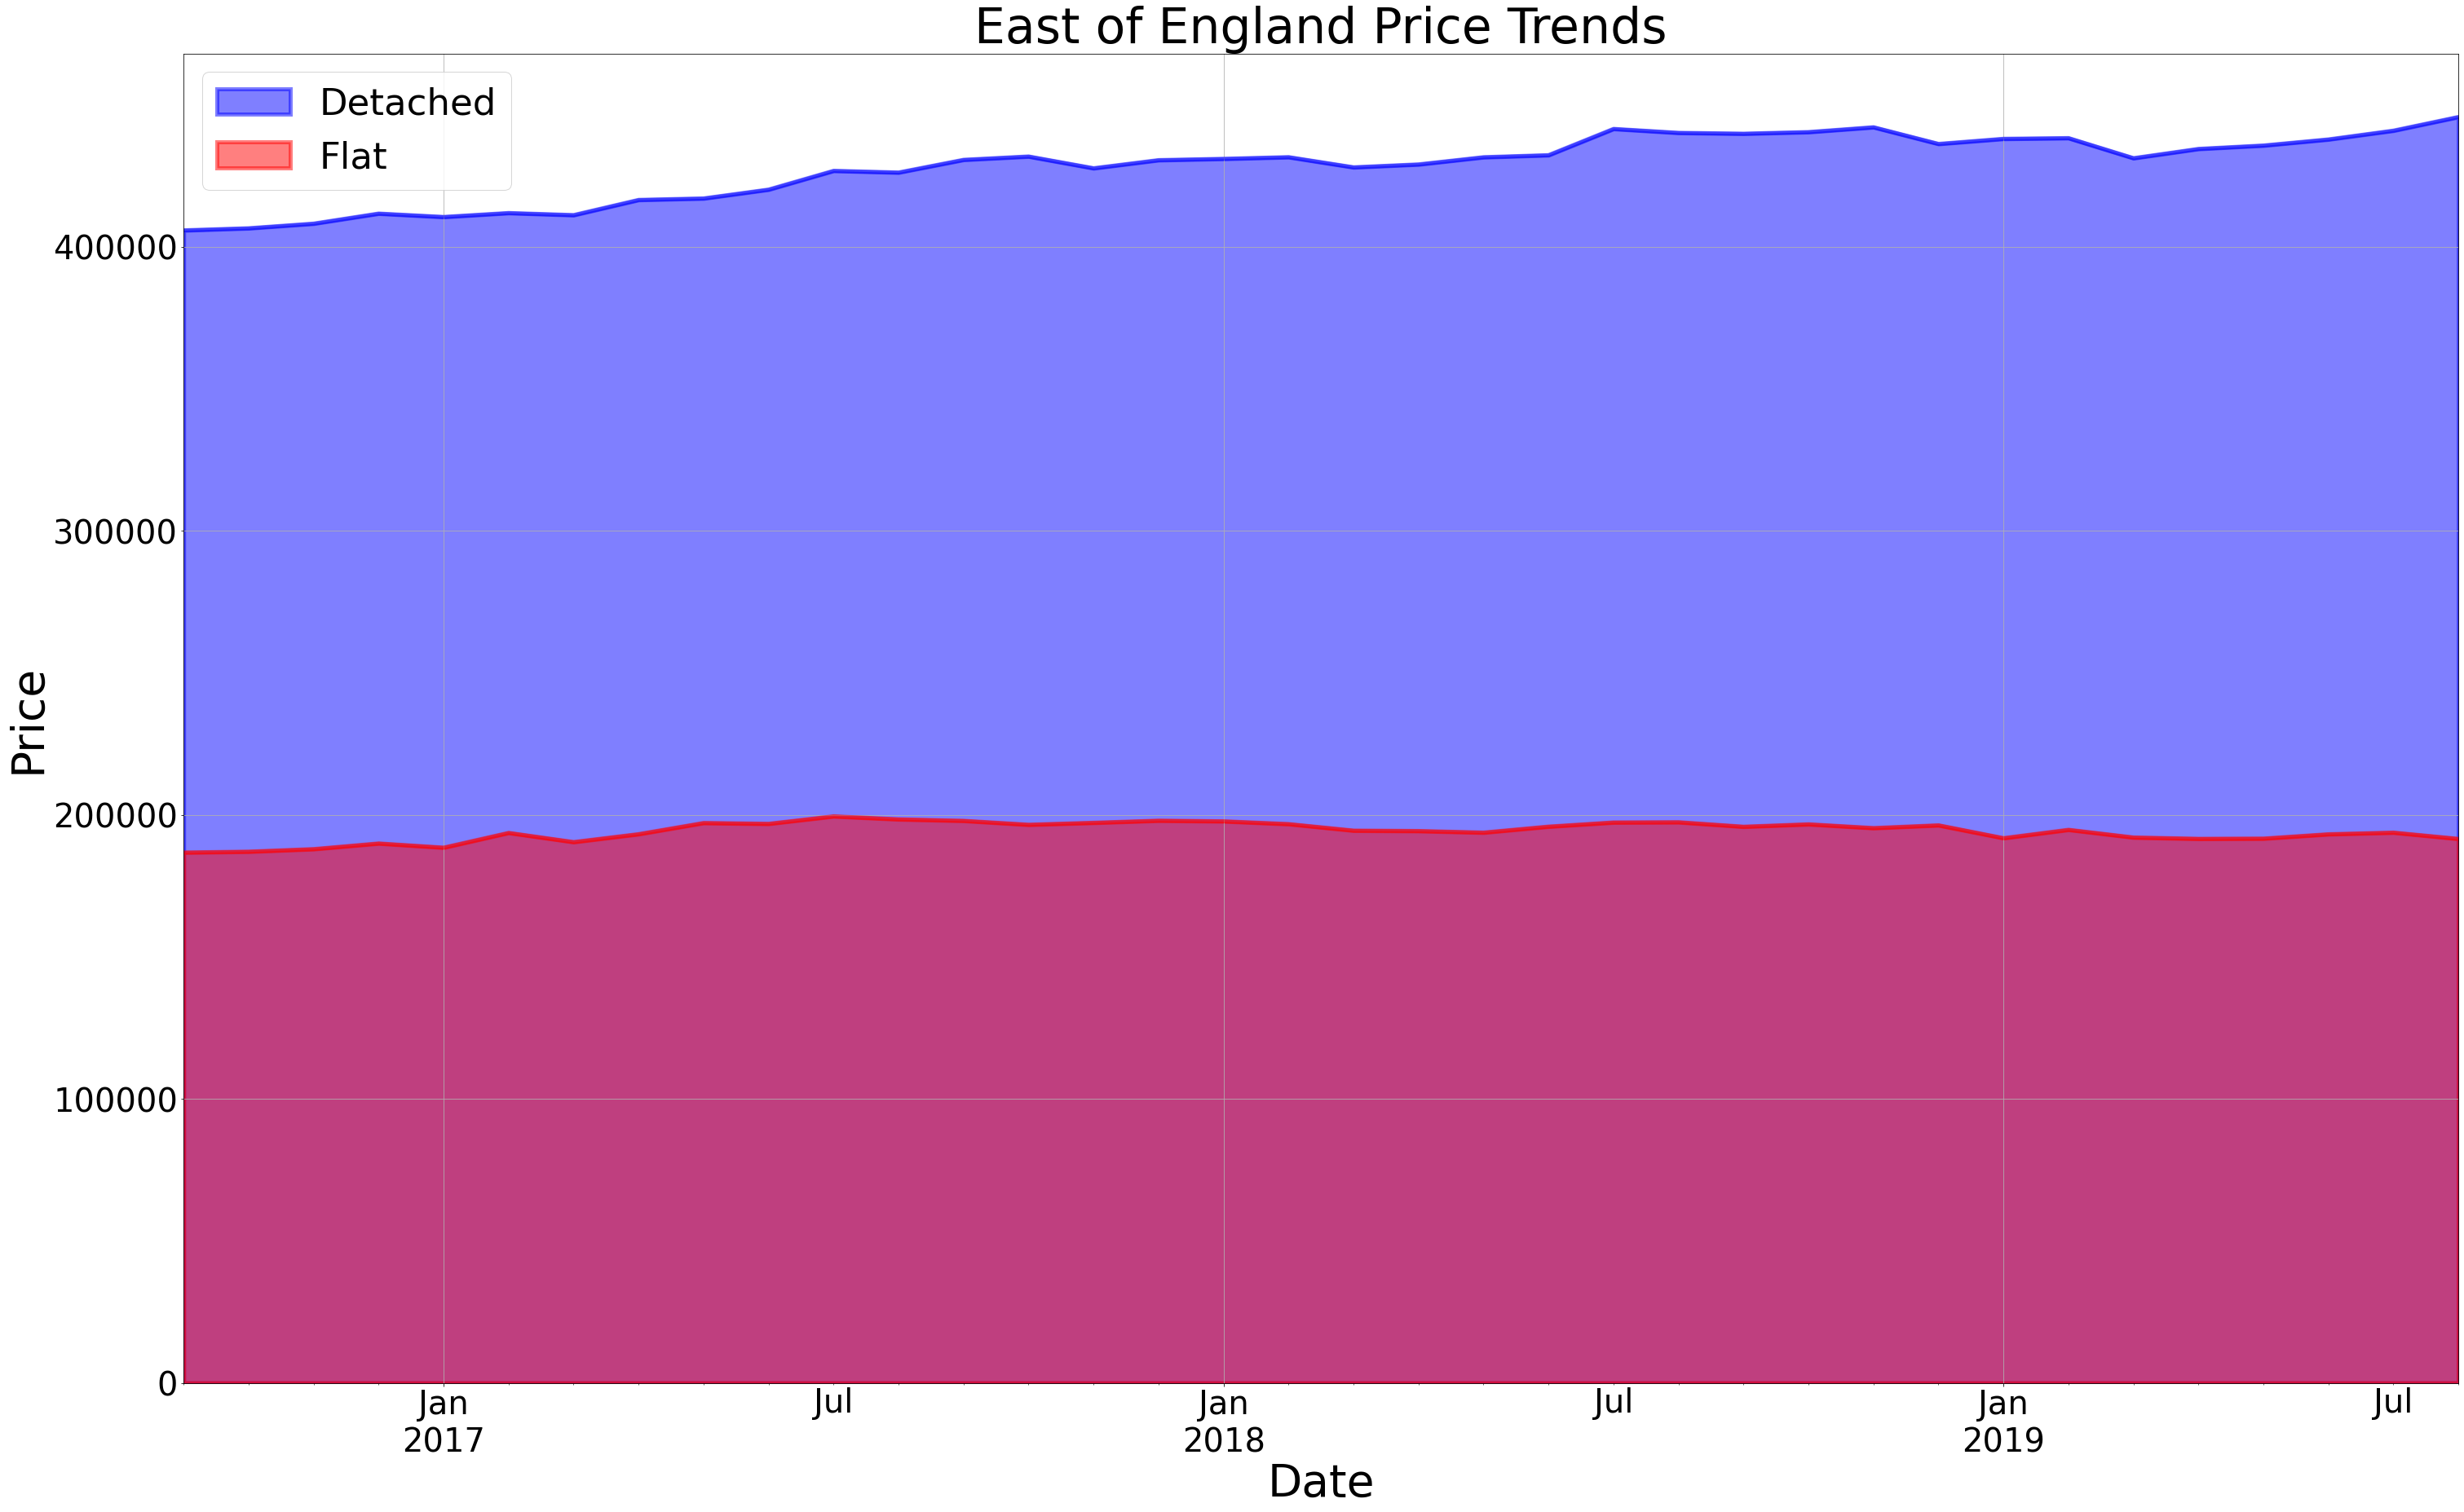

In [22]:
f1 = EE.plot(y=["Detached", 'Flat'], kind="area", stacked=False, color=['b','r'], figsize = (50,30), linewidth=5, fontsize=40)
f1.grid()
f1.legend(fontsize=45)
f1.set_ylabel('Price', fontsize=55)
f1.set_xlabel('Date', fontsize=55)
f1.set_title('East of England Price Trends', fontsize=60)

Text(0.5, 1.0, 'London Price Trends')

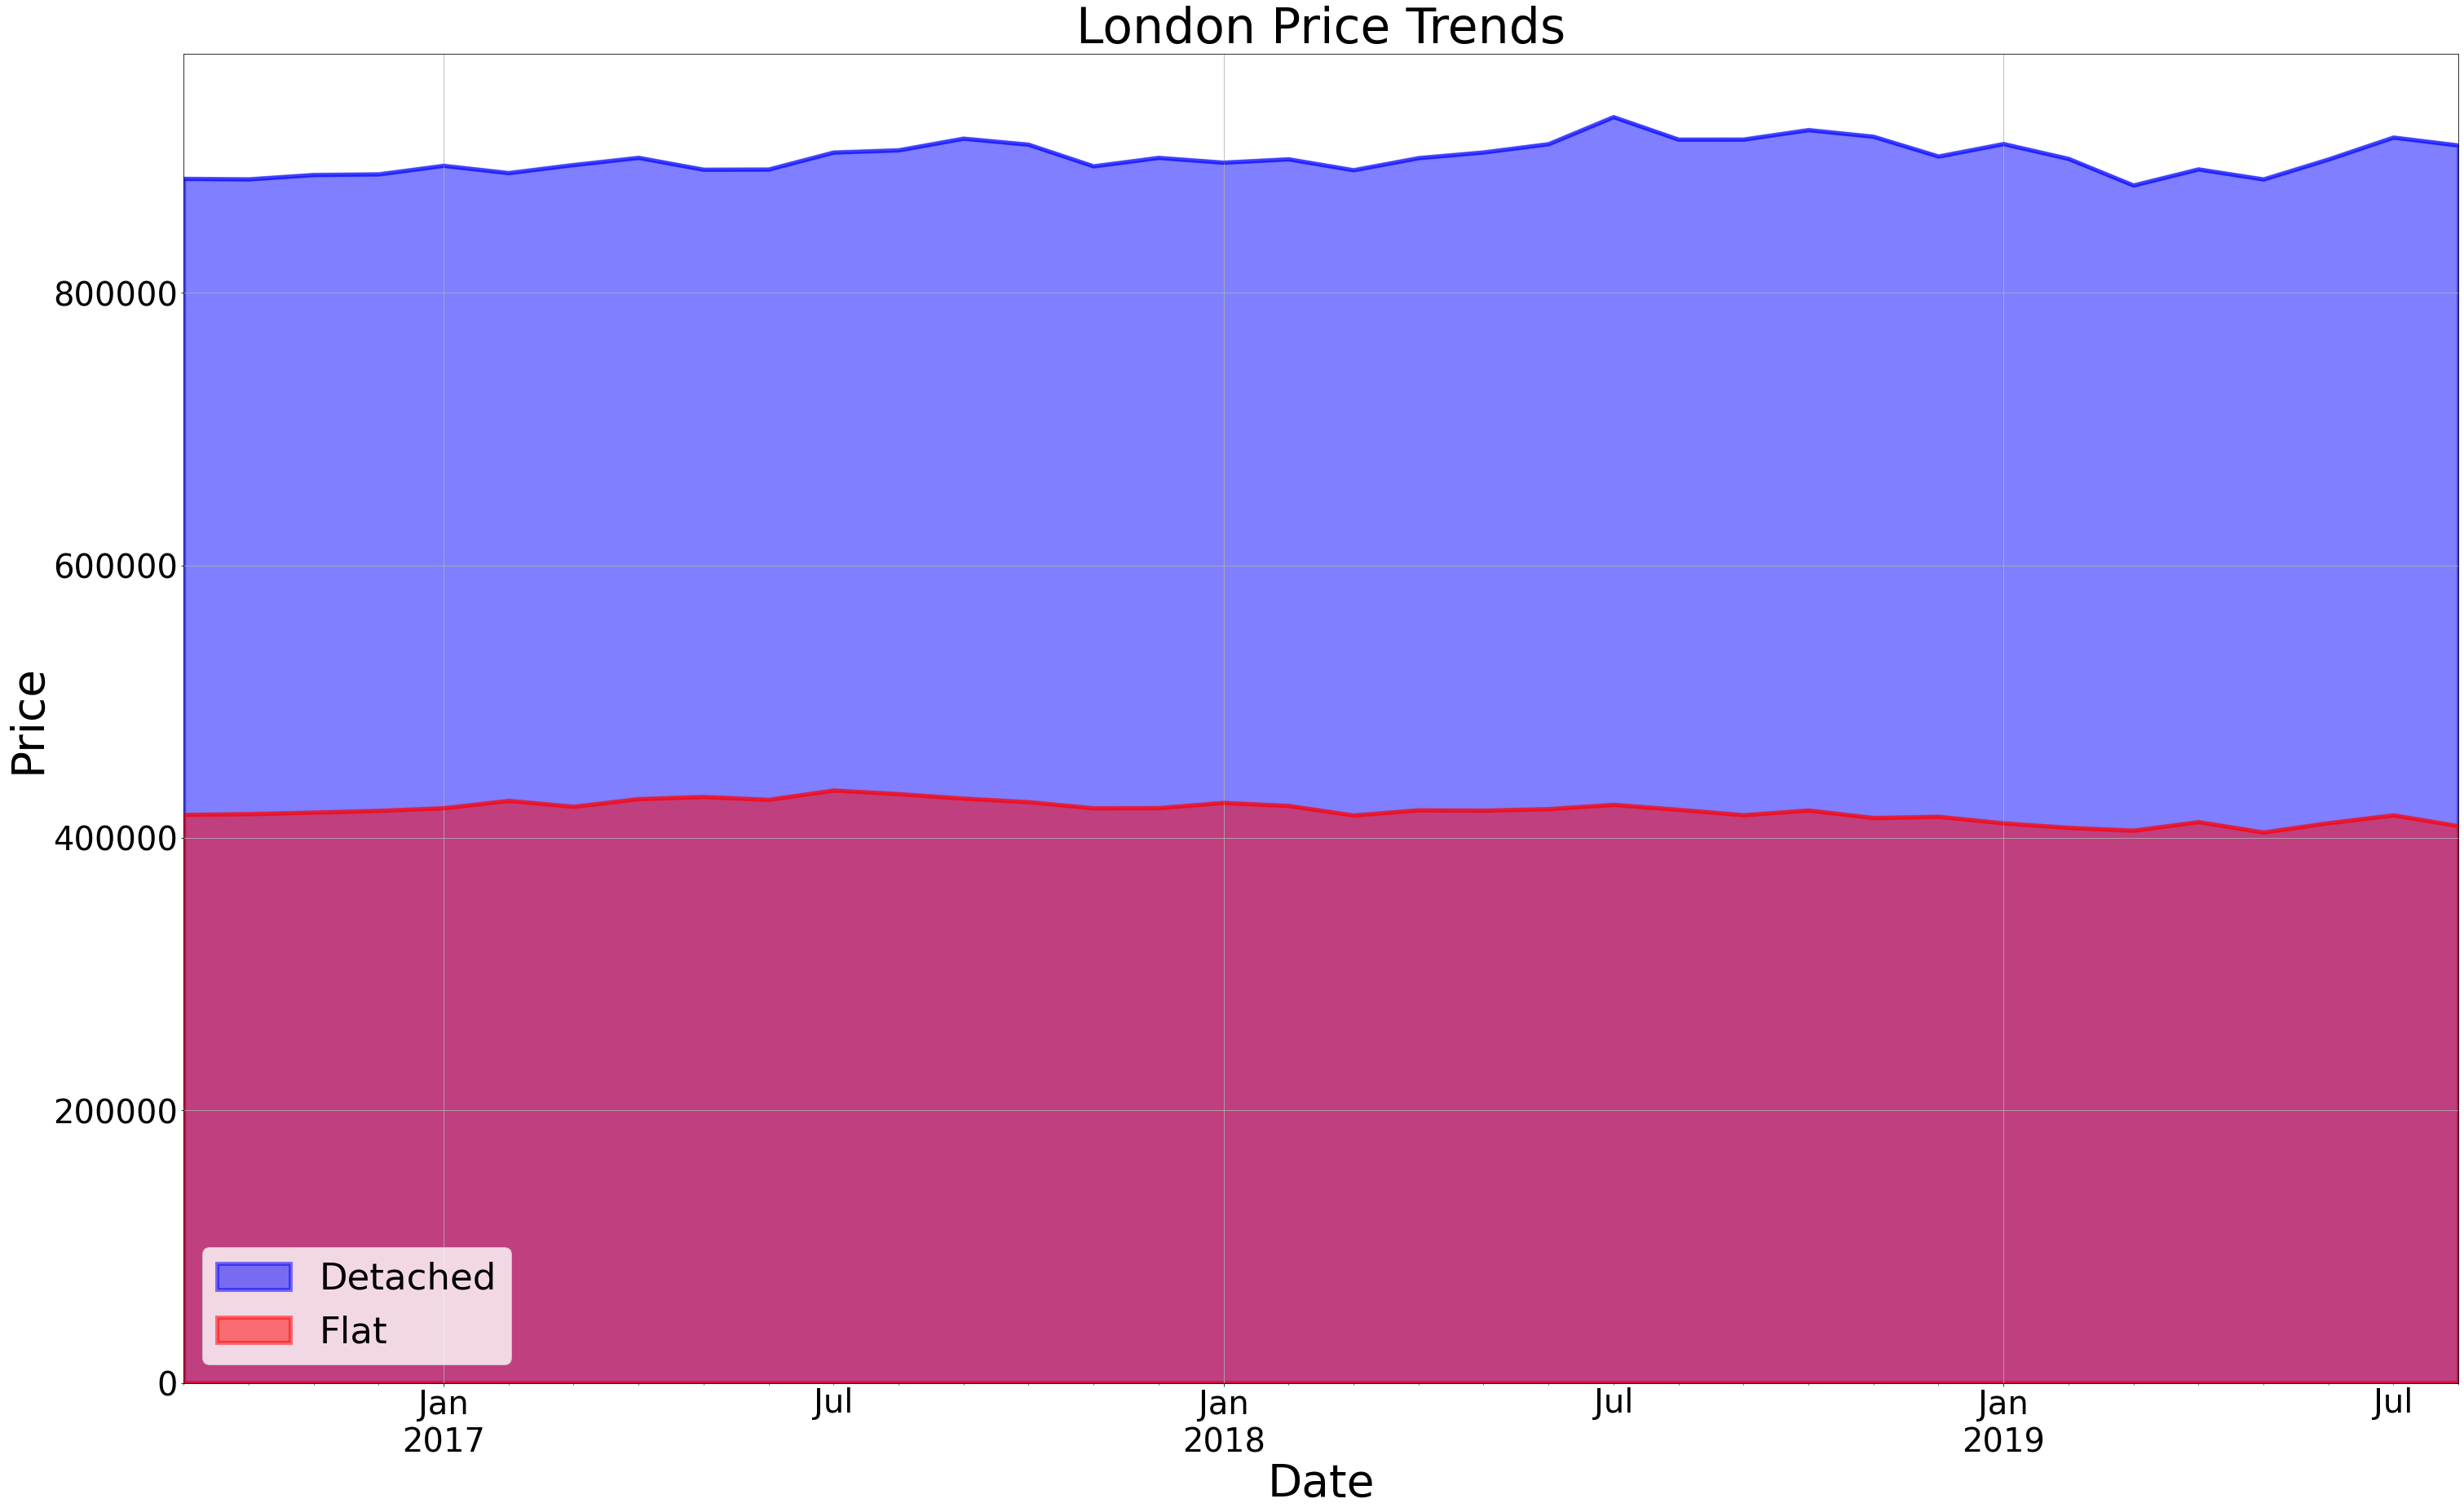

In [23]:
g1 = LDN.plot(y=["Detached", 'Flat'], kind="area", stacked=False, color=['b','r'], figsize = (50,30), linewidth=5, fontsize=40)
g1.grid()
g1.legend(fontsize=45)
g1.set_ylabel('Price', fontsize=55)
g1.set_xlabel('Date', fontsize=55)
g1.set_title('London Price Trends', fontsize=60)

Text(0.5, 1.0, 'South East Price Trends')

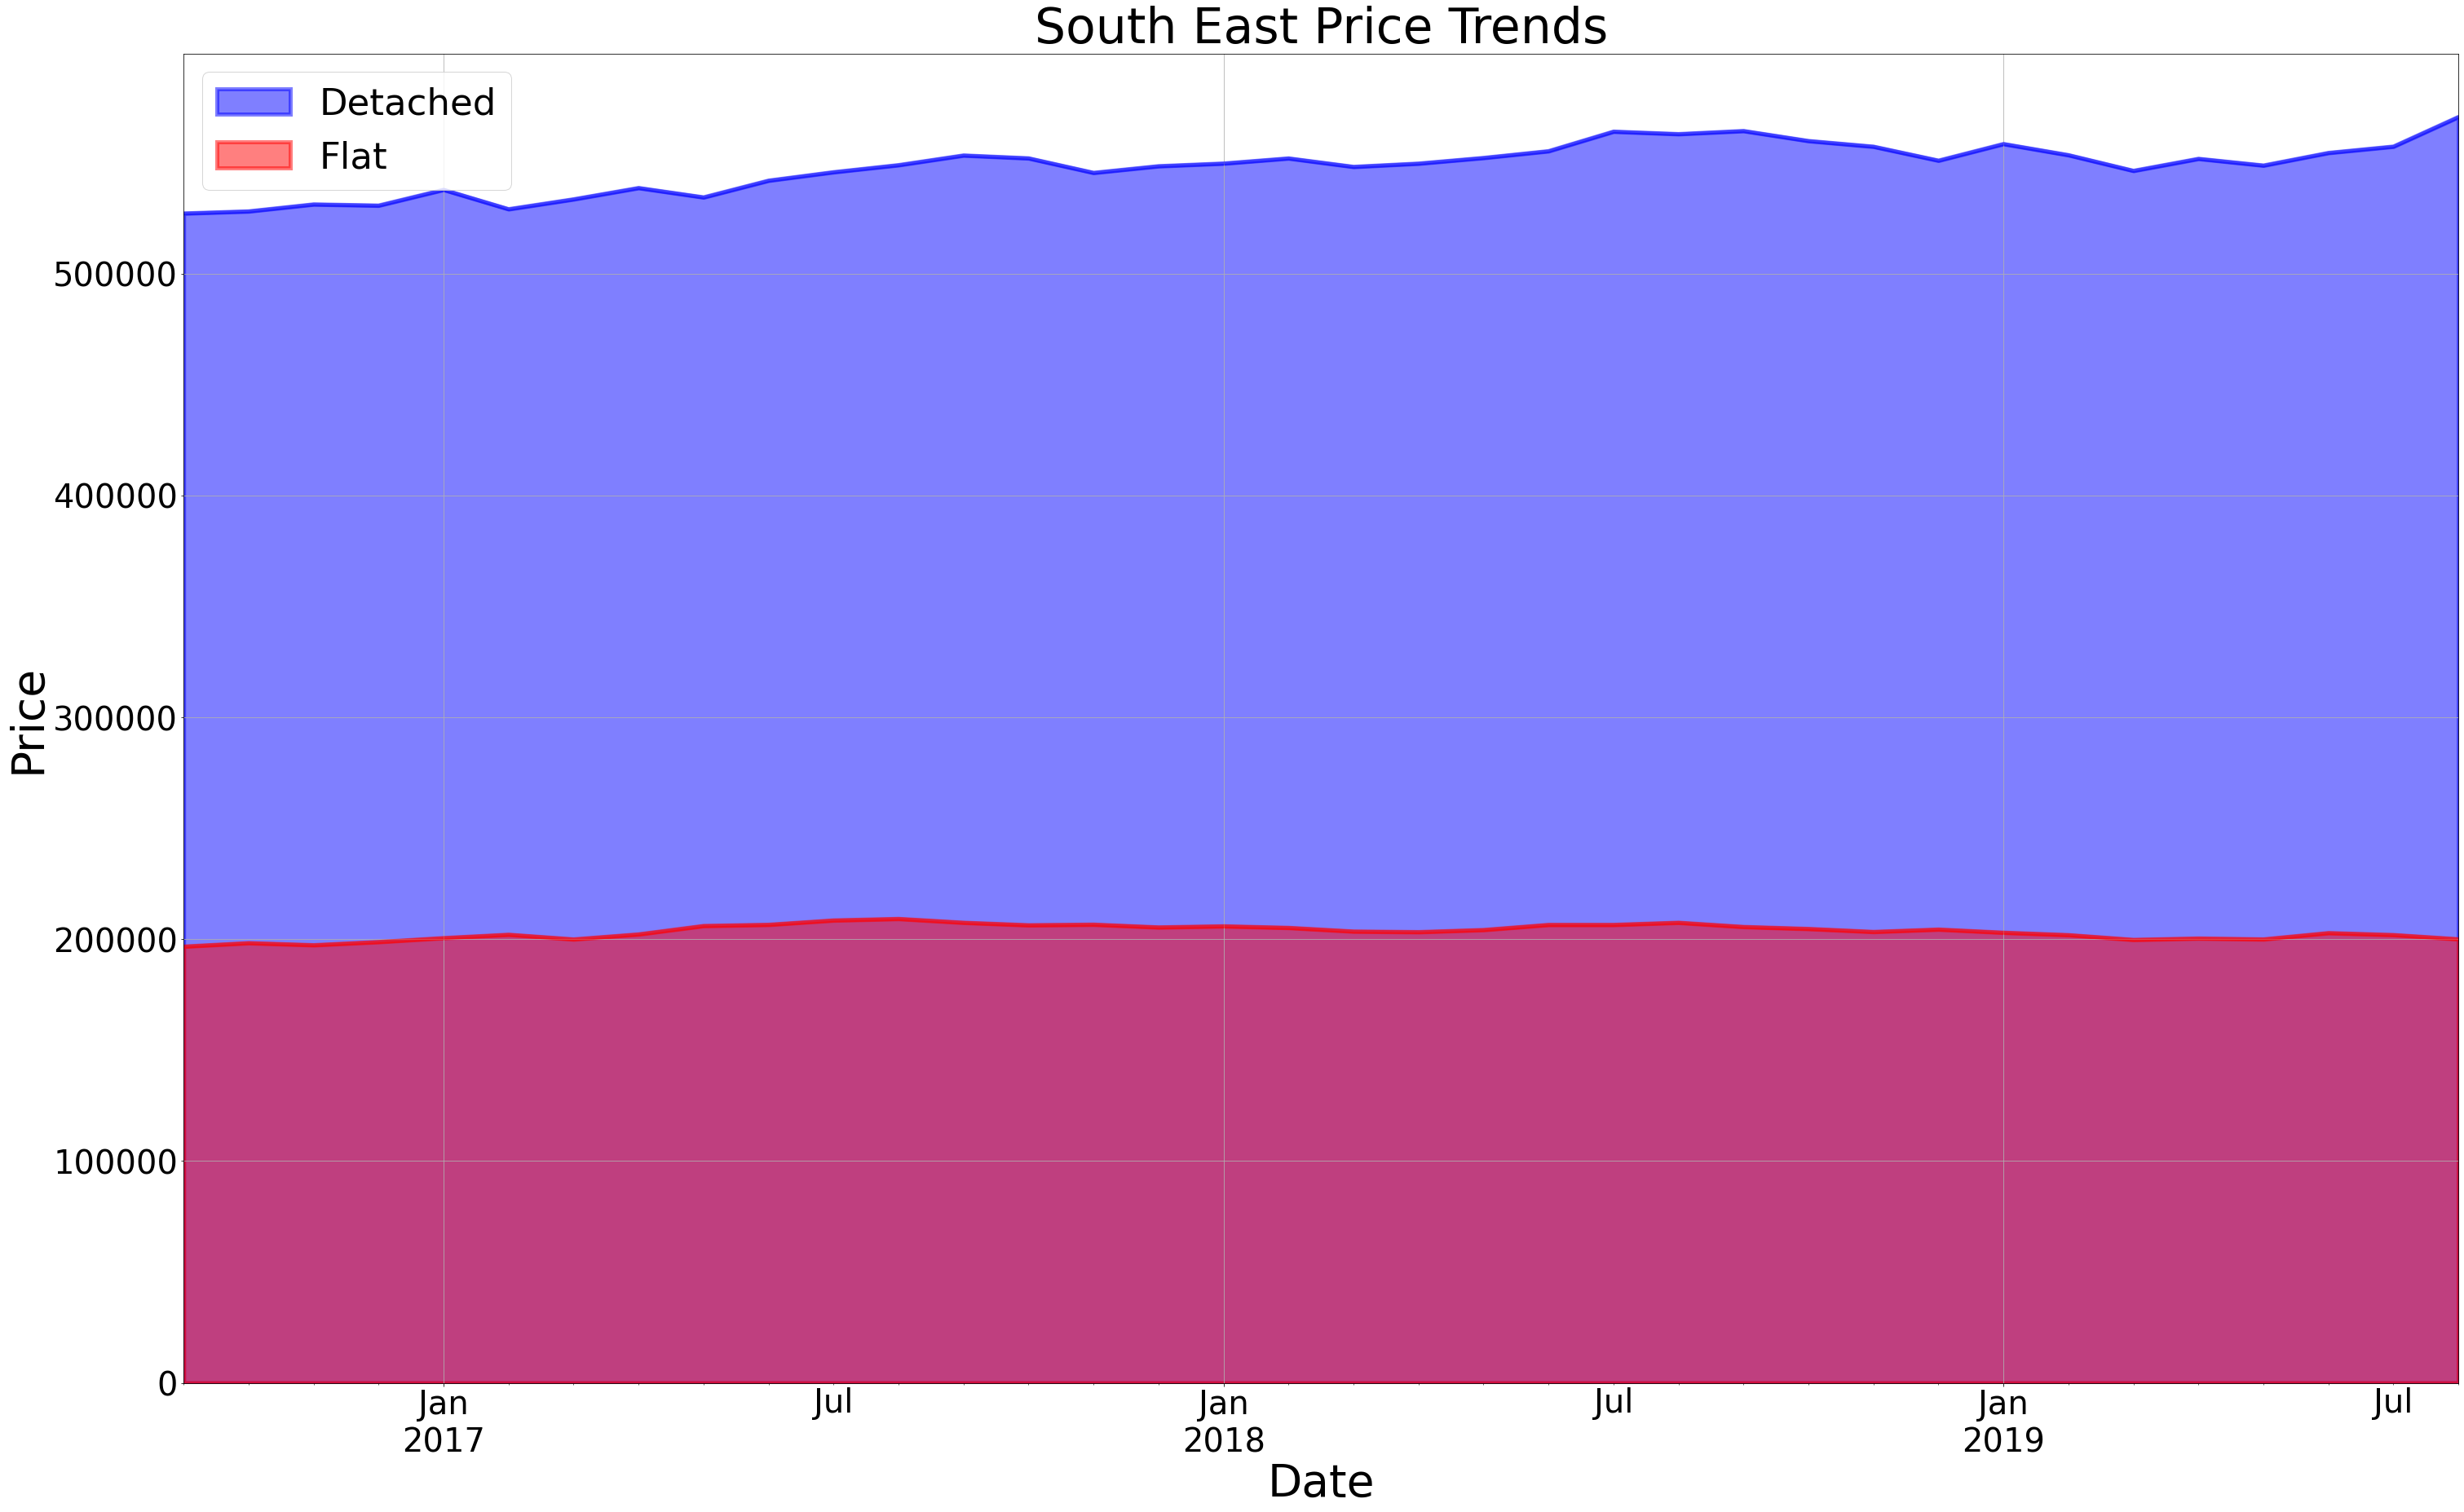

In [24]:
h1 = SE.plot(y=["Detached", 'Flat'], kind="area", stacked=False, color=['b','r'], figsize = (50,30), linewidth=5, fontsize=40)
h1.grid()
h1.legend(fontsize=45)
h1.set_ylabel('Price', fontsize=55)
h1.set_xlabel('Date', fontsize=55)
h1.set_title('South East Price Trends', fontsize=60)

Text(0.5, 1.0, 'South West Price Trends')

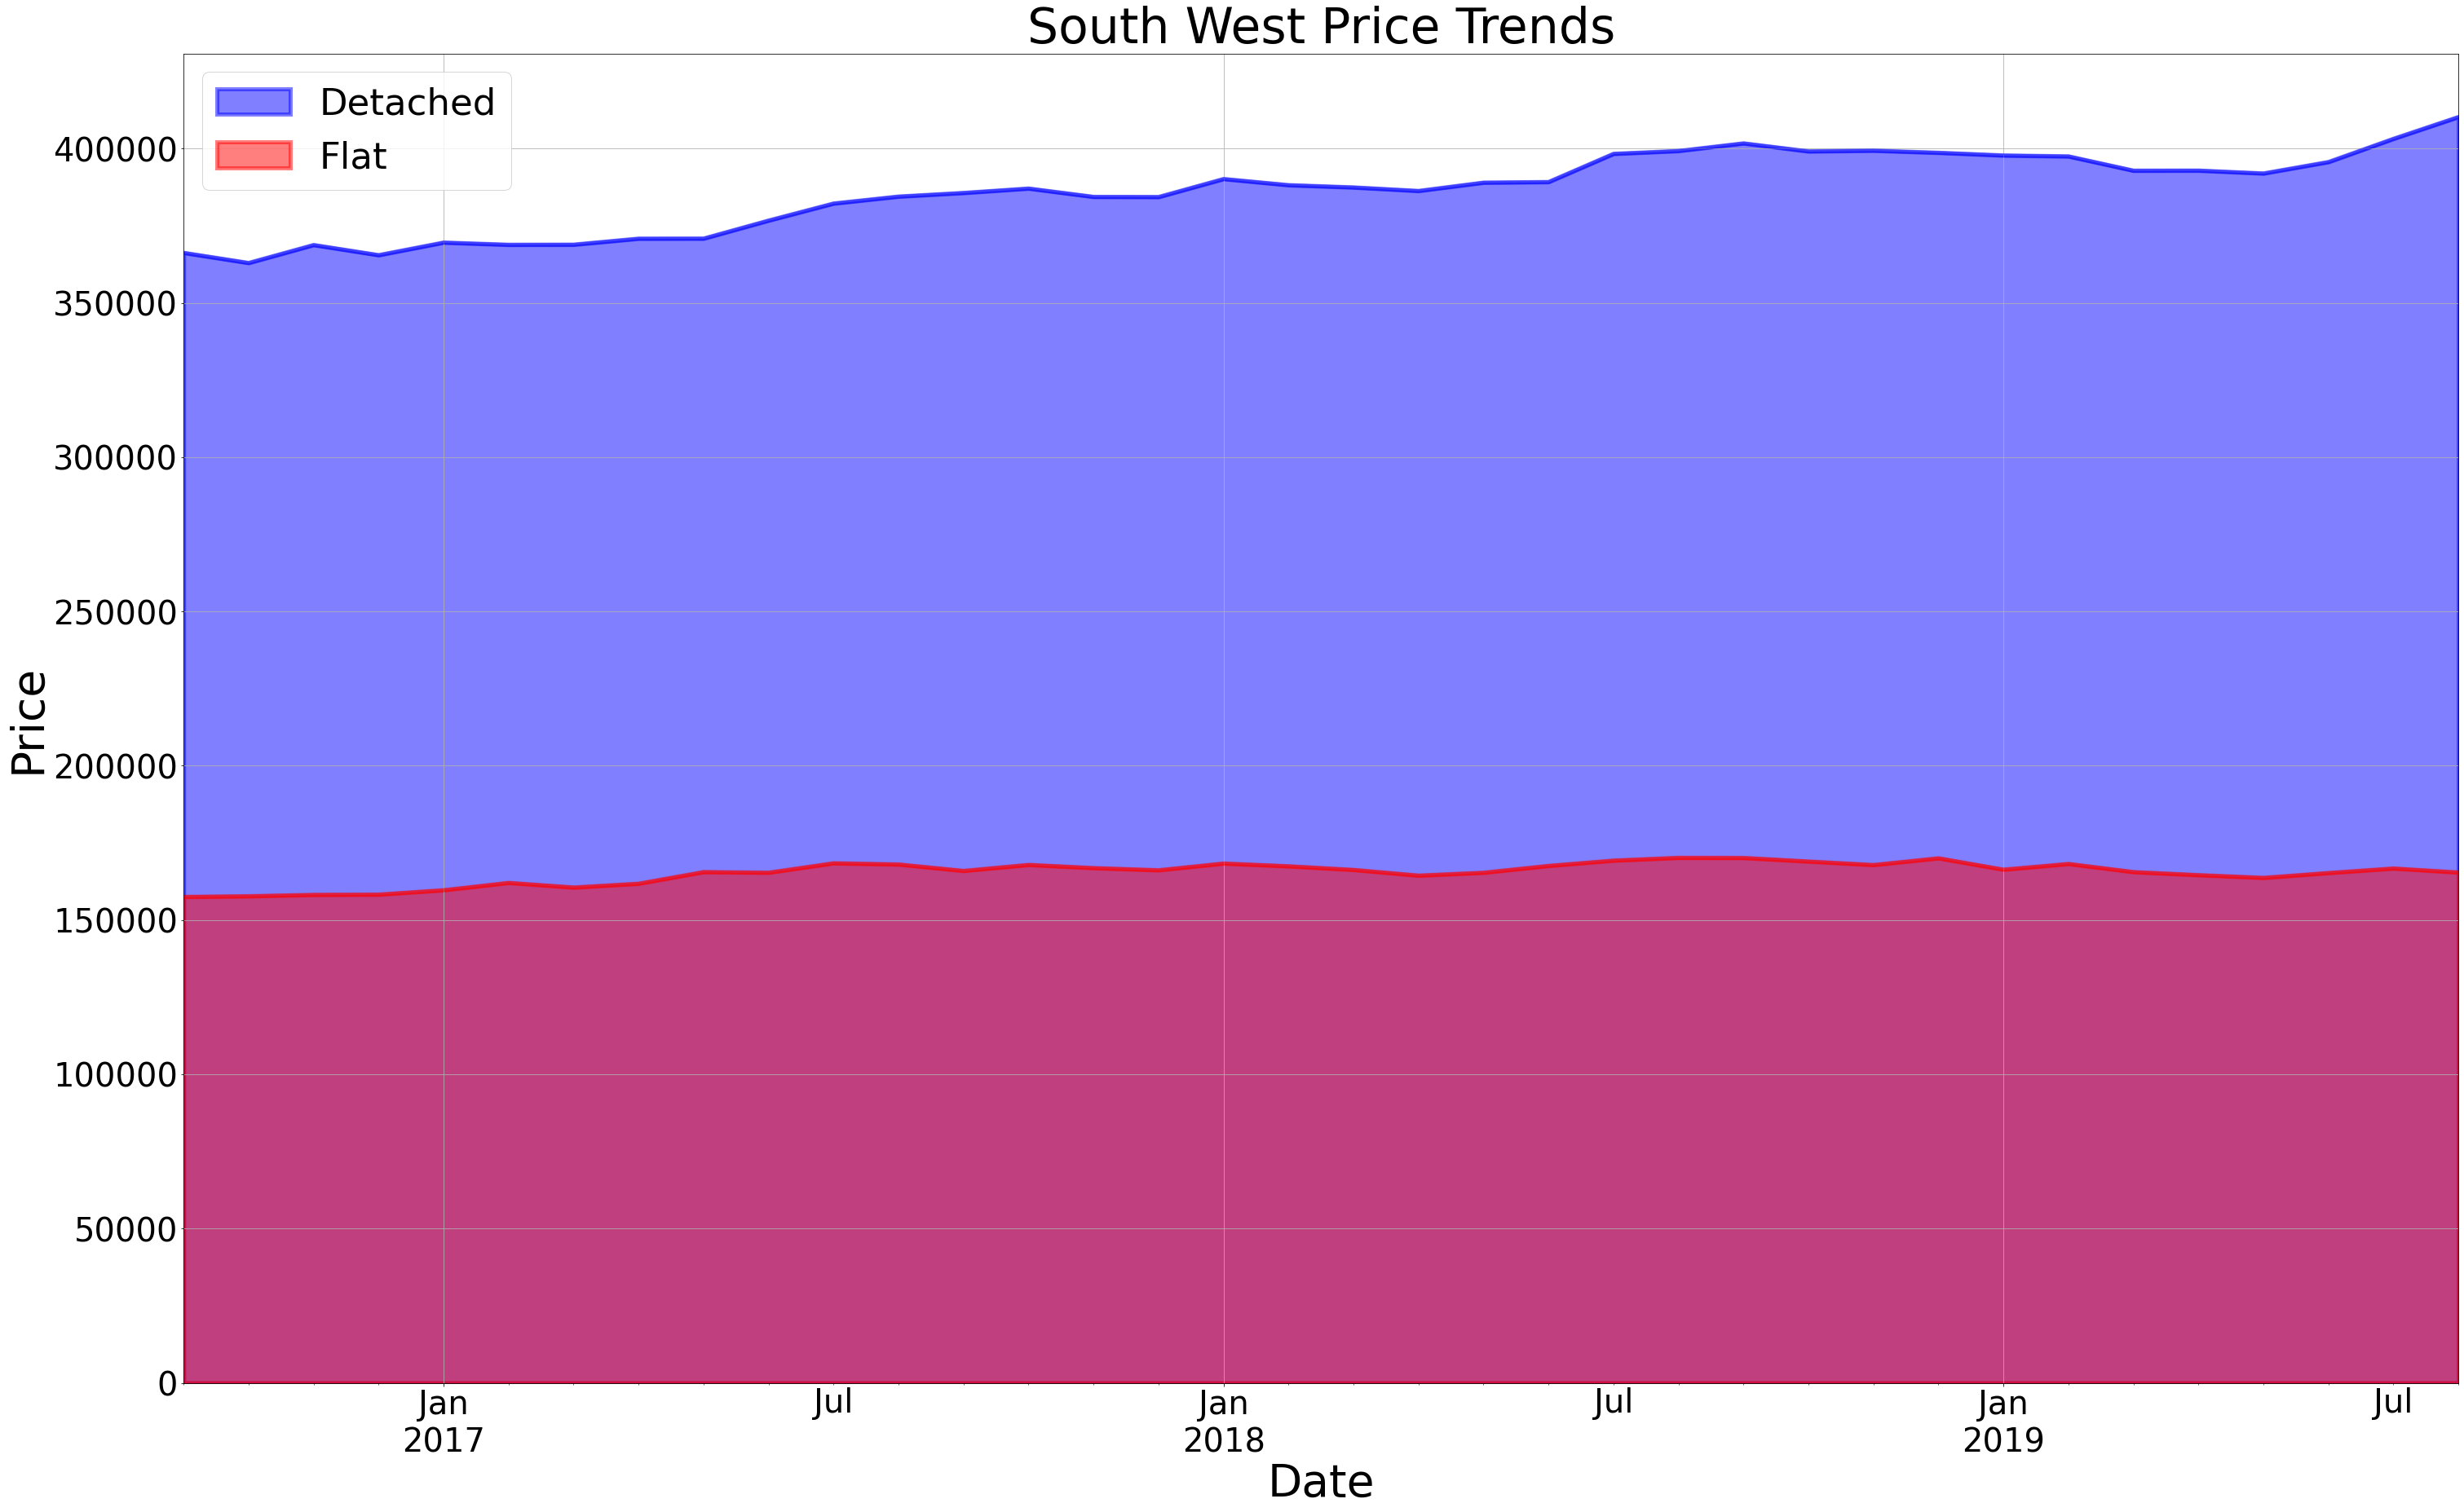

In [25]:
i1 = SW.plot(y=["Detached", 'Flat'], kind="area", stacked=False, color=['b','r'], figsize = (50,30), linewidth=5, fontsize=40)
i1.grid()
i1.legend(fontsize=45)
i1.set_ylabel('Price', fontsize=55)
i1.set_xlabel('Date', fontsize=55)
i1.set_title('South West Price Trends', fontsize=60)

### Section 3.3: Trends Between Given Time Periods

NameError: name 'sep_1_16' is not defined

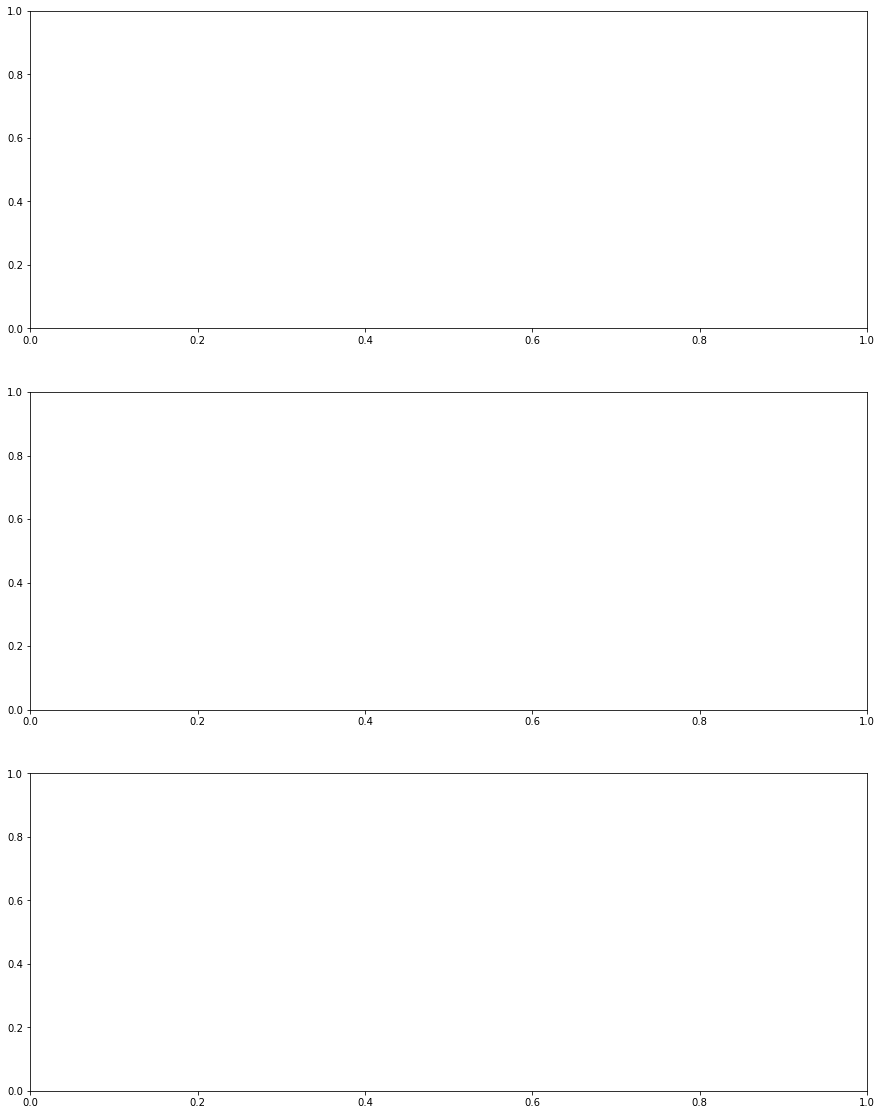

In [26]:
fig, (a1, b1, c1) = plt.subplots(3, 1, figsize=(15, 5))
plt.subplots_adjust(left=None, right=None, bottom=2, top=5, wspace=None, hspace=None)

a1.plot(NE.loc[sep_1_16:sep_1_17, 'Detached'], color='r', label='Detached')
a2 = a1.twinx()
a2.plot(NE.loc[sep_1_16:sep_1_17, 'Flat'], color='b', label='Flat')
a1.grid()
a1.legend(fontsize=15)
a2.legend(fontsize=15)
a1.set_ylabel('Detached', fontsize=20, color='r')
a2.set_ylabel('Flat', fontsize=20, color='b')
a1.set_title('North East: 1st September 2016 to 1st September 2017', fontsize=25)

b1.plot(NE.loc[sep_2_17:sep_2_18, 'Detached'], color='r', label='Detached')
b2 = b1.twinx()
b2.plot(NE.loc[sep_2_17:sep_2_18, 'Flat'], color='b', label='Flat')
b1.grid()
b1.legend(fontsize=15)
b2.legend(fontsize=15)
b1.set_ylabel('Detached', fontsize=20, color='r')
b2.set_ylabel('Flat', fontsize=20, color='b')
b1.set_title('North East: 2nd September 2017 to 2nd September 2018', fontsize=25)

c1.plot(NE.loc[sep_3_18:aug_1_19, 'Detached'], color='r', label='Detached')
c2 = c1.twinx()
c2.plot(NE.loc[sep_3_18:aug_1_19, 'Flat'], color='b', label='Flat')
c1.grid()
c1.legend(fontsize=15)
c2.legend(fontsize=15)
c1.set_ylabel('Detached', fontsize=20, color='r')
c2.set_ylabel('Flat', fontsize=20, color='b')
c1.set_title('North East: 3rd September 2018 to 1st August 2019', fontsize=25)

In [ ]:
fig, (a1, b1, c1) = plt.subplots(3, 1, figsize=(15, 5))
plt.subplots_adjust(left=None, right=None, bottom=2, top=5, wspace=None, hspace=None)

a1.plot(NW.loc[sep_1_16:sep_1_17, 'Detached'], color='r', label='Detached')
a2 = a1.twinx()
a2.plot(NW.loc[sep_1_16:sep_1_17, 'Flat'], color='b', label='Flat')
a1.grid()
a1.legend(fontsize=15)
a2.legend(fontsize=15)
a1.set_ylabel('Detached', fontsize=20, color='r')
a2.set_ylabel('Flat', fontsize=20, color='b')
a1.set_title('North West: 1st September 2016 to 1st September 2017', fontsize=25)

b1.plot(NW.loc[sep_2_17:sep_2_18, 'Detached'], color='r', label='Detached')
b2 = b1.twinx()
b2.plot(NW.loc[sep_2_17:sep_2_18, 'Flat'], color='b', label='Flat')
b1.grid()
b1.legend(fontsize=15)
b2.legend(fontsize=15)
b1.set_ylabel('Detached', fontsize=20, color='r')
b2.set_ylabel('Flat', fontsize=20, color='b')
b1.set_title('North West: 2nd September 2017 to 2nd September 2018', fontsize=25)

c1.plot(NW.loc[sep_3_18:aug_1_19, 'Detached'], color='r', label='Detached')
c2 = c1.twinx()
c2.plot(NW.loc[sep_3_18:aug_1_19, 'Flat'], color='b', label='Flat')
c1.grid()
c1.legend(fontsize=15)
c2.legend(fontsize=15)
c1.set_ylabel('Detached', fontsize=20, color='r')
c2.set_ylabel('Flat', fontsize=20, color='b')
c1.set_title('North West: 3rd September 2018 to 1st August 2019', fontsize=25)

In [ ]:
fig, (a1, b1, c1) = plt.subplots(3, 1, figsize=(15, 5))
plt.subplots_adjust(left=None, right=None, bottom=2, top=5, wspace=None, hspace=None)

a1.plot(YH.loc[sep_1_16:sep_1_17, 'Detached'], color='r', label='Detached')
a2 = a1.twinx()
a2.plot(YH.loc[sep_1_16:sep_1_17, 'Flat'], color='b', label='Flat')
a1.grid()
a1.legend(fontsize=15)
a2.legend(fontsize=15)
a1.set_ylabel('Detached', fontsize=20, color='r')
a2.set_ylabel('Flat', fontsize=20, color='b')
a1.set_title('Yorkshire and The Humber: 1st September 2016 to 1st September 2017', fontsize=25)

b1.plot(YH.loc[sep_2_17:sep_2_18, 'Detached'], color='r', label='Detached')
b2 = b1.twinx()
b2.plot(YH.loc[sep_2_17:sep_2_18, 'Flat'], color='b', label='Flat')
b1.grid()
b1.legend(fontsize=15)
b2.legend(fontsize=15)
b1.set_ylabel('Detached', fontsize=20, color='r')
b2.set_ylabel('Flat', fontsize=20, color='b')
b1.set_title('Yorkshire and The Humber: 2nd September 2017 to 2nd September 2018', fontsize=25)

c1.plot(YH.loc[sep_3_18:aug_1_19, 'Detached'], color='r', label='Detached')
c2 = c1.twinx()
c2.plot(YH.loc[sep_3_18:aug_1_19, 'Flat'], color='b', label='Flat')
c1.grid()
c1.legend(fontsize=15)
c2.legend(fontsize=15)
c1.set_ylabel('Detached', fontsize=20, color='r')
c2.set_ylabel('Flat', fontsize=20, color='b')
c1.set_title('Yorkshire and The Humber: 3rd September 2018 to 1st August 2019', fontsize=25)

In [ ]:
fig, (a1, b1, c1) = plt.subplots(3, 1, figsize=(15, 5))
plt.subplots_adjust(left=None, right=None, bottom=2, top=5, wspace=None, hspace=None)

a1.plot(EM.loc[sep_1_16:sep_1_17, 'Detached'], color='r', label='Detached')
a2 = a1.twinx()
a2.plot(EM.loc[sep_1_16:sep_1_17, 'Flat'], color='b', label='Flat')
a1.grid()
a1.legend(fontsize=15)
a2.legend(fontsize=15)
a1.set_ylabel('Detached', fontsize=20, color='r')
a2.set_ylabel('Flat', fontsize=20, color='b')
a1.set_title('East Midlands: 1st September 2016 to 1st September 2017', fontsize=25)

b1.plot(EM.loc[sep_2_17:sep_2_18, 'Detached'], color='r', label='Detached')
b2 = b1.twinx()
b2.plot(EM.loc[sep_2_17:sep_2_18, 'Flat'], color='b', label='Flat')
b1.grid()
b1.legend(fontsize=15)
b2.legend(fontsize=15)
b1.set_ylabel('Detached', fontsize=20, color='r')
b2.set_ylabel('Flat', fontsize=20, color='b')
b1.set_title('East Midlands: 2nd September 2017 to 2nd September 2018', fontsize=25)

c1.plot(EM.loc[sep_3_18:aug_1_19, 'Detached'], color='r', label='Detached')
c2 = c1.twinx()
c2.plot(EM.loc[sep_3_18:aug_1_19, 'Flat'], color='b', label='Flat')
c1.grid()
c1.legend(fontsize=15)
c2.legend(fontsize=15)
c1.set_ylabel('Detached', fontsize=20, color='r')
c2.set_ylabel('Flat', fontsize=20, color='b')
c1.set_title('East Midlands: 3rd September 2018 to 1st August 2019', fontsize=25)

In [ ]:
fig, (a1, b1, c1) = plt.subplots(3, 1, figsize=(15, 5))
plt.subplots_adjust(left=None, right=None, bottom=2, top=5, wspace=None, hspace=None)

a1.plot(WM.loc[sep_1_16:sep_1_17, 'Detached'], color='r', label='Detached')
a2 = a1.twinx()
a2.plot(WM.loc[sep_1_16:sep_1_17, 'Flat'], color='b', label='Flat')
a1.grid()
a1.legend(fontsize=15)
a2.legend(fontsize=15)
a1.set_ylabel('Detached', fontsize=20, color='r')
a2.set_ylabel('Flat', fontsize=20, color='b')
a1.set_title('West Midlands: 1st September 2016 to 1st September 2017', fontsize=25)

b1.plot(WM.loc[sep_2_17:sep_2_18, 'Detached'], color='r', label='Detached')
b2 = b1.twinx()
b2.plot(WM.loc[sep_2_17:sep_2_18, 'Flat'], color='b', label='Flat')
b1.grid()
b1.legend(fontsize=15)
b2.legend(fontsize=15)
b1.set_ylabel('Detached', fontsize=20, color='r')
b2.set_ylabel('Flat', fontsize=20, color='b')
b1.set_title('West Midlands: 2nd September 2017 to 2nd September 2018', fontsize=25)

c1.plot(WM.loc[sep_3_18:aug_1_19, 'Detached'], color='r', label='Detached')
c2 = c1.twinx()
c2.plot(WM.loc[sep_3_18:aug_1_19, 'Flat'], color='b', label='Flat')
c1.grid()
c1.legend(fontsize=15)
c2.legend(fontsize=15)
c1.set_ylabel('Detached', fontsize=20, color='r')
c2.set_ylabel('Flat', fontsize=20, color='b')
c1.set_title('West Midlands: 3rd September 2018 to 1st August 2019', fontsize=25)

In [ ]:
fig, (a1, b1, c1) = plt.subplots(3, 1, figsize=(15, 5))
plt.subplots_adjust(left=None, right=None, bottom=2, top=5, wspace=None, hspace=None)

a1.plot(EE.loc[sep_1_16:sep_1_17, 'Detached'], color='r', label='Detached')
a2 = a1.twinx()
a2.plot(EE.loc[sep_1_16:sep_1_17, 'Flat'], color='b', label='Flat')
a1.grid()
a1.legend(fontsize=15)
a2.legend(fontsize=15)
a1.set_ylabel('Detached', fontsize=20, color='r')
a2.set_ylabel('Flat', fontsize=20, color='b')
a1.set_title('East of England: 1st September 2016 to 1st September 2017', fontsize=25)

b1.plot(EE.loc[sep_2_17:sep_2_18, 'Detached'], color='r', label='Detached')
b2 = b1.twinx()
b2.plot(EE.loc[sep_2_17:sep_2_18, 'Flat'], color='b', label='Flat')
b1.grid()
b1.legend(fontsize=15)
b2.legend(fontsize=15)
b1.set_ylabel('Detached', fontsize=20, color='r')
b2.set_ylabel('Flat', fontsize=20, color='b')
b1.set_title('East of England: 2nd September 2017 to 2nd September 2018', fontsize=25)

c1.plot(EE.loc[sep_3_18:aug_1_19, 'Detached'], color='r', label='Detached')
c2 = c1.twinx()
c2.plot(EE.loc[sep_3_18:aug_1_19, 'Flat'], color='b', label='Flat')
c1.grid()
c1.legend(fontsize=15)
c2.legend(fontsize=15)
c1.set_ylabel('Detached', fontsize=20, color='r')
c2.set_ylabel('Flat', fontsize=20, color='b')
c1.set_title('East of England: 3rd September 2018 to 1st August 2019', fontsize=25)

In [ ]:
fig, (a1, b1, c1) = plt.subplots(3, 1, figsize=(15, 5))
plt.subplots_adjust(left=None, right=None, bottom=2, top=5, wspace=None, hspace=None)

a1.plot(LDN.loc[sep_1_16:sep_1_17, 'Detached'], color='r', label='Detached')
a2 = a1.twinx()
a2.plot(LDN.loc[sep_1_16:sep_1_17, 'Flat'], color='b', label='Flat')
a1.grid()
a1.legend(fontsize=15)
a2.legend(fontsize=15)
a1.set_ylabel('Detached', fontsize=20, color='r')
a2.set_ylabel('Flat', fontsize=20, color='b')
a1.set_title('London: 1st September 2016 to 1st September 2017', fontsize=25)

b1.plot(LDN.loc[sep_2_17:sep_2_18, 'Detached'], color='r', label='Detached')
b2 = b1.twinx()
b2.plot(LDN.loc[sep_2_17:sep_2_18, 'Flat'], color='b', label='Flat')
b1.grid()
b1.legend(fontsize=15)
b2.legend(fontsize=15)
b1.set_ylabel('Detached', fontsize=20, color='r')
b2.set_ylabel('Flat', fontsize=20, color='b')
b1.set_title('London: 2nd September 2017 to 2nd September 2018', fontsize=25)

c1.plot(LDN.loc[sep_3_18:aug_1_19, 'Detached'], color='r', label='Detached')
c2 = c1.twinx()
c2.plot(LDN.loc[sep_3_18:aug_1_19, 'Flat'], color='b', label='Flat')
c1.grid()
c1.legend(fontsize=15)
c2.legend(fontsize=15)
c1.set_ylabel('Detached', fontsize=20, color='r')
c2.set_ylabel('Flat', fontsize=20, color='b')
c1.set_title('London: 3rd September 2018 to 1st August 2019', fontsize=25)

In [ ]:
fig, (a1, b1, c1) = plt.subplots(3, 1, figsize=(15, 5))
plt.subplots_adjust(left=None, right=None, bottom=2, top=5, wspace=None, hspace=None)

a1.plot(SE.loc[sep_1_16:sep_1_17, 'Detached'], color='r', label='Detached')
a2 = a1.twinx()
a2.plot(SE.loc[sep_1_16:sep_1_17, 'Flat'], color='b', label='Flat')
a1.grid()
a1.legend(fontsize=15)
a2.legend(fontsize=15)
a1.set_ylabel('Detached', fontsize=20, color='r')
a2.set_ylabel('Flat', fontsize=20, color='b')
a1.set_title('South East: 1st September 2016 to 1st September 2017', fontsize=25)

b1.plot(SE.loc[sep_2_17:sep_2_18, 'Detached'], color='r', label='Detached')
b2 = b1.twinx()
b2.plot(SE.loc[sep_2_17:sep_2_18, 'Flat'], color='b', label='Flat')
b1.grid()
b1.legend(fontsize=15)
b2.legend(fontsize=15)
b1.set_ylabel('Detached', fontsize=20, color='r')
b2.set_ylabel('Flat', fontsize=20, color='b')
b1.set_title('South East: 2nd September 2017 to 2nd September 2018', fontsize=25)

c1.plot(SE.loc[sep_3_18:aug_1_19, 'Detached'], color='r', label='Detached')
c2 = c1.twinx()
c2.plot(SE.loc[sep_3_18:aug_1_19, 'Flat'], color='b', label='Flat')
c1.grid()
c1.legend(fontsize=15)
c2.legend(fontsize=15)
c1.set_ylabel('Detached', fontsize=20, color='r')
c2.set_ylabel('Flat', fontsize=20, color='b')
c1.set_title('South East: 3rd September 2018 to 1st August 2019', fontsize=25)

In [ ]:
fig, (a1, b1, c1) = plt.subplots(3, 1, figsize=(15, 5))
plt.subplots_adjust(left=None, right=None, bottom=2, top=5, wspace=None, hspace=None)

a1.plot(SW.loc[sep_1_16:sep_1_17, 'Detached'], color='r', label='Detached')
a2 = a1.twinx()
a2.plot(SW.loc[sep_1_16:sep_1_17, 'Flat'], color='b', label='Flat')
a1.grid()
a1.legend(fontsize=15)
a2.legend(fontsize=15)
a1.set_ylabel('Detached', fontsize=20, color='r')
a2.set_ylabel('Flat', fontsize=20, color='b')
a1.set_title('South West: 1st September 2016 to 1st September 2017', fontsize=25)

b1.plot(SW.loc[sep_2_17:sep_2_18, 'Detached'], color='r', label='Detached')
b2 = b1.twinx()
b2.plot(SW.loc[sep_2_17:sep_2_18, 'Flat'], color='b', label='Flat')
b1.grid()
b1.legend(fontsize=15)
b2.legend(fontsize=15)
b1.set_ylabel('Detached', fontsize=20, color='r')
b2.set_ylabel('Flat', fontsize=20, color='b')
b1.set_title('South West: 2nd September 2017 to 2nd September 2018', fontsize=25)

c1.plot(SW.loc[sep_3_18:aug_1_19, 'Detached'], color='r', label='Detached')
c2 = c1.twinx()
c2.plot(SW.loc[sep_3_18:aug_1_19, 'Flat'], color='b', label='Flat')
c1.grid()
c1.legend(fontsize=15)
c2.legend(fontsize=15)
c1.set_ylabel('Detached', fontsize=20, color='r')
c2.set_ylabel('Flat', fontsize=20, color='b')
c1.set_title('South West: 3rd September 2018 to 1st August 2019', fontsize=25)

*A better visualisation would see a line chart with each Region having a line over a given time period. Flat and Detached charts would be separate. This would give a clearer view of the price trend differences between Regions for a given time period.*

### Section 3.4: Comments and Comparisons
* The first group of line charts give an overall view of the price trends in each region over the 36 month period. Broadly, Detached properties and Flats have similar price trends.
* For every Region and property type, bar London Flats, there is a gradual price increase over the 36 month period.
<br>
* The second group of area charts give a good visualisation of the price difference between Flats and Detached properties.
* The area charts show that Detached properties are, mostly, slightly more than double the price of Flats.
* The area charts support the above finding that all Regions and property types see a gradual increase in price, bar London Flats.
<br>
* The third group of line charts give a closer view of the price trends according to a respective third of the 36 month period.
* For each of the three years, there is often a decline in the price of both property types for the first quarter (25th December to 25th March). Prices then pick up in the second quarter (26th March to 24th June), and then tend to dip again towards the end of the calendar year.
* However, there is significant variation for each Region. Therefore no strong conclusions can be made regarding the effect of time of year on price trends.

## Section 4: Price Changes

### Section 4.1: Calculating Price Changes

In [ ]:
prices17 = area.loc[area.Month == '2017-08-01']
prices18 = area.loc[area.Month == '2018-08-01']

In [ ]:
priceChanges = pd.merge(prices17, prices18, left_on='Area', right_on='Area')

In [ ]:
priceChanges2 = priceChanges.assign(ValueChange = priceChanges.Flat_x - priceChanges.Flat_y, PercentageChange = ((priceChanges.Flat_x / priceChanges.Flat_y)*100)-100)

### Section 4.2: Visualising Price Changes

In [ ]:
NE2 = priceChanges2[(priceChanges2.Region_x == 'North East')]
NW2 = priceChanges2[(priceChanges2.Region_x == 'North West')]
YH2 = priceChanges2[(priceChanges2.Region_x == 'Yorkshire and The Humber')]
EM2 = priceChanges2[(priceChanges2.Region_x == 'East Midlands')]
WM2 = priceChanges2[(priceChanges2.Region_x == 'West Midlands Region')]
EE2 = priceChanges2[(priceChanges2.Region_x == 'East of England')]
LDN2 = priceChanges2[(priceChanges2.Region_x == 'London')]
SE2 = priceChanges2[(priceChanges2.Region_x == 'South East')]
SW2 = priceChanges2[(priceChanges2.Region_x == 'South West')]

In [ ]:
a1 = NE2.plot(x='Area', y='PercentageChange', kind='bar') 
a1.set_title('North East Price Changes', fontsize=15)

In [ ]:
a1 = NW2.plot(x='Area', y='PercentageChange', kind='bar') 
a1.set_title('North West Price Changes', fontsize=15)

In [ ]:
a1 = YH2.plot(x='Area', y='PercentageChange', kind='bar') 
a1.set_title('Yorkshire and The Humber Price Changes', fontsize=15)

In [ ]:
a1 = EM2.plot(x='Area', y='PercentageChange', kind='bar') 
a1.set_title('East Midlands Price Changes', fontsize=15)

In [ ]:
a1 = EE2.plot(x='Area', y='PercentageChange', kind='bar') 
a1.set_title('East of England Price Changes', fontsize=15)

In [ ]:
a1 = LDN2.plot(x='Area', y='PercentageChange', kind='bar') 
a1.set_title('London Price Changes', fontsize=15)

In [ ]:
a1 = SE2.plot(x='Area', y='PercentageChange', kind='bar') 
a1.set_title('South East Price Changes', fontsize=15)

In [ ]:
a1 = SW2.plot(x='Area', y='PercentageChange', kind='bar') 
a1.set_title('South West Price Changes', fontsize=15)

* *more extensive analysis could have been performed on the price changes so that more significant conclusions could be made*
* *for instance, ValueChanges could be compared and mean Value/Percentage Changes could be calculated and compared*

### Section 4.3: Comments
* The bar charts above show percentage changes in Flat prices from July 2017 2017 to July 2018.
* The North East, London and the South East saw a majority of price rises in the given 12 months, while all other Regions saw the majority of their Areas' Flat prices decline.
* For all Regions bar London, the range of the percentage change in prices does not exceed 6% or -5%. This implies that London Flat prices are more volatile, at least for the given year. 
* However, the Area in London that has the greatest decrease in price is an outlier. Kensington and Chelsea's 10% price drop far exceeds any other London Area. Although, the greatest increase is 7.5%, which is at least one and a half percentage points greater than any other Area's price increase in the UK.  

## Section 5: Statistical Analysis
* Cross-tabulate the number of areas in which the price has increased and the number has decreased, by region
* Use a chi-square test to determine whether there is evidence that the regions differ.
* Interpret the results you obtain, including what you can and cannot determine from the result.

### Section 5.1: Cross-Tabulation

In [ ]:
def UpDown(row):
    if (row.ValueChange > 0) : return 'Increase'
    if (row.ValueChange < 0) : return 'Decrease'

priceChanges2.apply(UpDown, axis=1)
priceChanges3 = priceChanges2.assign(IncreaseDecrease = priceChanges2.apply(UpDown, axis=1))              

In [ ]:
priceChanges4 = pd.crosstab(priceChanges3.IncreaseDecrease, [priceChanges3.Region_x], margins=False)
priceChanges4

### Section 5.2: Chi-Square Test

In [ ]:
test_stat, p_value, dof, expected = stats.chi2_contingency(priceChanges4, correction=False)

print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.6f %%' % (p_value*100))

In [ ]:
priceChanges4 - expected.round(1)

A p-value of 0.000004 is extremely small and thus provides very strong evidence that the null hypothesis is not true. The p-value means that there is less than a 0.0004% chance that the null is correct. There is therefore very weak evidence that the change in Flat prices has affected all regions similarly.